# USD - MSADS 500B Final Project_Submission 

# Part 1: Data preparation:

In [627]:
#### Import the needed pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab 
from pylab import xticks
import seaborn as sns
import statistics
import statsmodels.api as sm
import warnings
import plotly.express as px
#import geopandas as gpd
#from shapely.geometry import Point, Polygon
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
%matplotlib inline

In [628]:
#### Read and get to know about the file
house_raw = pd.read_csv("C:/Users/barry/Documents/Data/house_sales.csv")
house_raw.info()
house_raw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       20479 non-null  float64
 4   bathrooms      20545 non-null  float64
 5   sqft_living    20503 non-null  float64
 6   sqft_lot       20569 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3.0,2.50,1530.0,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4.0,2.50,2310.0,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2.0,0.75,1020.0,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3.0,2.50,1600.0,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [629]:
#### Count the missing values
house_raw.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [630]:
#Initial descriptive statistics prior to conducting any data wrangling
house_raw.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,20479.000000,20545.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372821,2.113507,2081.073697,1.517982e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930711,0.768913,915.043176,4.148617e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [631]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


#### From the above info we can know, there are 4 varaibles that contain missing values.
#### First, Let's see how the 4 variables distribution.

<AxesSubplot:xlabel='sqft_lot'>

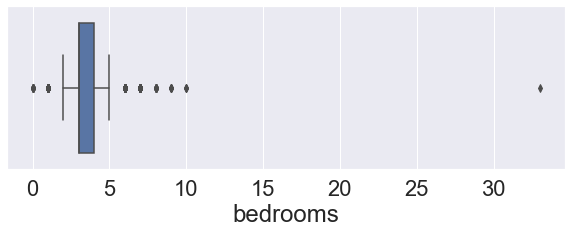

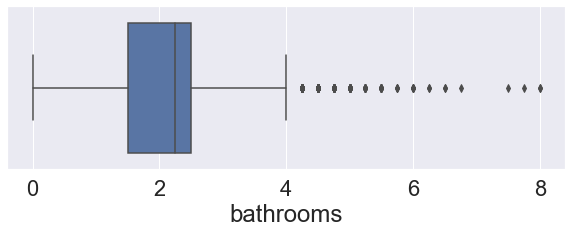

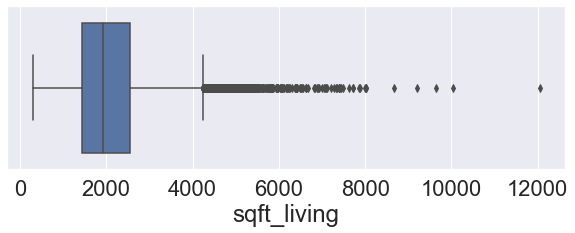

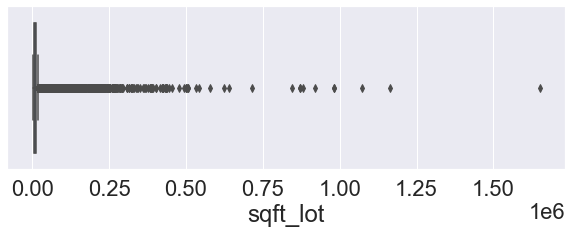

In [632]:
fig,ax = plt.subplots(figsize = (10,3))
sns.boxplot(house_raw.bedrooms)

fig,ax = plt.subplots(figsize = (10,3))
sns.boxplot(house_raw.bathrooms)

fig,ax = plt.subplots(figsize = (10,3))
sns.boxplot(house_raw.sqft_living)

fig,ax = plt.subplots(figsize = (10,3))
sns.boxplot(house_raw.sqft_lot)

#### All 4 variables are right skwed. Outliers data points will have a significant impact on the mean. 
## We will evaluate two approaches to repalcing these values and test their validity using our machine learning algorithms
## The two methods for replacing NaN values we will use are: median (house_raw) and machine learning (mldf)

In [633]:
#Will split these two data frames for different methodologies

housing_ml = pd.read_csv("C:/Users/barry/Documents/Data/house_sales.csv")

In [634]:
#### Count the missing values
housing_ml.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [635]:
house_raw['bedrooms'] = house_raw['bedrooms'].fillna(house_raw['bedrooms'].median())
house_raw['bathrooms'] = house_raw['bathrooms'].fillna(house_raw['bathrooms'].median())
house_raw['sqft_living'] = house_raw['sqft_living'].fillna(house_raw['sqft_living'].median())
house_raw['sqft_lot'] = house_raw['sqft_lot'].fillna(house_raw['sqft_lot'].median())

In [636]:
# confirm all the missing values has been replaced
house_raw.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [637]:
# Replace the bedroom outlier:
house_raw['bedrooms'].value_counts().to_frame()

,bedrooms
3.0,10420
4.0,6519
2.0,2617
5.0,1539
6.0,263
1.0,189
7.0,34
8.0,12
0.0,11
9.0,5


In [638]:
house_raw['bedrooms'] = house_raw['bedrooms'].replace(33.0, 3.0, regex=True)
house_raw['bedrooms'].value_counts().to_frame()

,bedrooms
3.0,10421
4.0,6519
2.0,2617
5.0,1539
6.0,263
1.0,189
7.0,34
8.0,12
0.0,11
9.0,5


## This is the machine learning method (housing_ml)

#### I will need to exctract the NaN values into a dataframe and drop sqft_living from the train df

In [639]:
#This is the mldf method

#### Count the missing values
housing_ml.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [640]:
#I will use sqft_living15, sqft_above and grade as predictors for since they have the highest corr and do not contain NaN values
mldf = housing_ml[['sqft_living15', 'sqft_above', 'grade', 'sqft_living']]
mldf.head()

,sqft_living15,sqft_above,grade,sqft_living
0,1340,1180,7,1180.0
1,1690,2170,7,2570.0
2,2720,770,6,770.0
3,1360,1050,7,1960.0
4,1800,1680,8,1680.0


In [641]:
#Verify I have the df subset correctly with NaN values
mldf.isnull().sum()

sqft_living15       0
sqft_above          0
grade               0
sqft_living      1110
dtype: int64

In [642]:
#Subset the data frame as the test data frame
test_df= mldf[mldf["sqft_living"].isnull()]
print(test_df.shape)
test_df.head()

(1110, 4)


,sqft_living15,sqft_above,grade,sqft_living
10,2210,1860,8,NaN
12,1780,1430,7,NaN
23,1220,1070,7,NaN
32,1460,1510,7,NaN
37,1730,2360,8,NaN


In [643]:
#Verify the 1110 NaN values have been dropped
mldf = mldf.dropna()
print(mldf.shape)

(20503, 4)


In [644]:
#Set up the ML model axis
y_train = mldf['sqft_living']
x_train = mldf.drop('sqft_living', axis = 1)
x_test = test_df.drop('sqft_living', axis = 1)

In [645]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [646]:
#Calculate how to predict the y value
y_pred = lr.predict(x_test)

In [647]:
#Add the y_pred back into my subset dataframe I used for ML
test_df['y_pred'] = y_pred
test_df

,sqft_living15,sqft_above,grade,sqft_living,y_pred
10,2210,1860,8,NaN,2230.068964
12,1780,1430,7,NaN,1700.824088
23,1220,1070,7,NaN,1312.980539
32,1460,1510,7,NaN,1672.317942
37,1730,2360,8,NaN,2444.157669
...,...,...,...,...,...
21492,1910,1910,8,NaN,2186.446563
21519,1220,880,8,NaN,1312.191692
21534,1720,1650,8,NaN,1961.676996
21542,1370,2630,9,NaN,2661.388176


In [648]:
housing_ml['sqft_living'].fillna(test_df['y_pred'], inplace = True)

In [649]:
housing_ml.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living         0
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Will take the same approach for sqft_lot

In [650]:
housing_ml.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.003478,0.002095,-0.011312,-0.133237,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.310823,0.526600,0.700520,0.088422,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.003478,0.310823,1.000000,0.515814,0.572920,0.028413,0.178472,-0.004474,0.082579,0.028169,0.359268,0.478380,0.302168,0.156249,0.019990,-0.154337,-0.009264,0.130509,0.392849,0.025323
bathrooms,0.002095,0.526600,0.515814,1.000000,0.752026,0.086867,0.501394,0.068412,0.186092,-0.125976,0.665890,0.685552,0.284030,0.507716,0.049887,-0.205680,0.027456,0.224369,0.569493,0.088615
sqft_living,-0.011312,0.700520,0.572920,0.752026,1.000000,0.169639,0.361259,0.104371,0.281452,-0.063594,0.767271,0.880612,0.416079,0.323346,0.054374,-0.201680,0.051773,0.243799,0.760946,0.181361
sqft_lot,-0.133237,0.088422,0.028413,0.086867,0.169639,1.000000,-0.005682,0.021173,0.074342,-0.009154,0.111713,0.181152,0.015569,0.052165,0.008996,-0.131311,-0.087750,0.229369,0.145112,0.728800
floors,0.018525,0.256794,0.178472,0.501394,0.361259,-0.005682,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.004474,0.068412,0.104371,0.021173,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.082579,0.186092,0.281452,0.074342,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028169,-0.125976,-0.063594,-0.009154,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


#### The only variable that has a high correlation with sqft_lot is sqft_lot15, so I will use this to predict NaN values

In [651]:

mllot = housing_ml[['sqft_lot', 'sqft_lot15']]
mllot.head()

,sqft_lot,sqft_lot15
0,5650.0,5650
1,7242.0,7639
2,10000.0,8062
3,5000.0,5000
4,8080.0,7503


In [652]:
#Verify I have the df subset correctly with NaN values
mllot.isnull().sum()

sqft_lot      1044
sqft_lot15       0
dtype: int64

In [653]:
test_lot= mllot[mllot["sqft_lot"].isnull()]
print(test_lot.shape)
test_lot.head()

(1044, 2)


,sqft_lot,sqft_lot15
23,NaN,8386
69,NaN,20158
95,NaN,6045
102,NaN,47777
111,NaN,3536


In [654]:
#Verify the 1044 NaN values have been dropped
mllot = mllot.dropna()
print(mllot.shape)

(20569, 2)


In [655]:
#Set up the ML model axis
y_train = mllot['sqft_lot']
x_train = mllot.drop('sqft_lot', axis = 1)
x_test = test_lot.drop('sqft_lot', axis = 1)

In [656]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [657]:
y_pred = lr.predict(x_test)

In [658]:
test_lot['y_pred'] = y_pred
test_lot

,sqft_lot,sqft_lot15,y_pred
23,NaN,8386,10293.854576
69,NaN,20158,23206.662522
95,NaN,6045,7725.991562
102,NaN,47777,53502.180926
111,NaN,3536,4973.847905
...,...,...,...
21563,NaN,5123,6714.641840
21564,NaN,4650,6195.804076
21565,NaN,4563,6100.373029
21570,NaN,5019,6600.563347


In [659]:
housing_ml['sqft_lot'].fillna(test_lot['y_pred'], inplace = True)

In [660]:
housing_ml.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### I need to replace the bedroom outlier

In [661]:
#There is only 1 outlier in bedrooms (33).  Since bedrooms are integers, I will use mode anyways, which won't be affected by the outlier
print("Mode of bedrooms is % s" % (statistics.mode(housing_ml['bedrooms'])))

Mode of bedrooms is 3.0


In [662]:
#Returning to the bedrooms issue from before, I need to replace 33 with 3 since it is a data entry error
housing_ml["bedrooms"] = housing_ml["bedrooms"].replace(33.0, 3.0, regex=True)

#check that the value has been replaced
housing_ml['bedrooms'].value_counts().to_frame()

,bedrooms
3.0,9287
4.0,6519
2.0,2617
5.0,1539
6.0,263
1.0,189
7.0,34
8.0,12
0.0,11
9.0,5


#### I want to look at correlations between all of the variables again to see how to solve for NaN in bedrooms and bathrooms

In [663]:
housing_ml.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.004794,0.002095,-0.011312,-0.132142,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.318373,0.526600,0.700520,0.088464,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.004794,0.318373,1.000000,0.530558,0.588458,0.028402,0.184539,-0.004450,0.085195,0.024955,0.369402,0.492133,0.308876,0.161578,0.020842,-0.159061,-0.010992,0.135205,0.404490,0.026450
bathrooms,0.002095,0.526600,0.530558,1.000000,0.752026,0.086502,0.501394,0.068412,0.186092,-0.125976,0.665890,0.685552,0.284030,0.507716,0.049887,-0.205680,0.027456,0.224369,0.569493,0.088615
sqft_living,-0.011312,0.700520,0.588458,0.752026,1.000000,0.169105,0.361259,0.104371,0.281452,-0.063594,0.767271,0.880612,0.416079,0.323346,0.054374,-0.201680,0.051773,0.243799,0.760946,0.181361
sqft_lot,-0.132142,0.088464,0.028402,0.086502,0.169105,1.000000,-0.006572,0.022069,0.074643,-0.007780,0.111096,0.180962,0.014829,0.052471,0.008094,-0.130525,-0.086882,0.228625,0.146513,0.734000
floors,0.018525,0.256794,0.184539,0.501394,0.361259,-0.006572,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.004450,0.068412,0.104371,0.022069,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.085195,0.186092,0.281452,0.074643,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.024955,-0.125976,-0.063594,-0.007780,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


#### bathrooms and sqft_living have a 0.59 correlation
#### I want to group the bedrooms size by sqft_living bins to see how to allocate the NaN values

In [664]:
housing_ml['sqft_bins'] = pd.cut(housing_ml['sqft_living'], bins = [0, 2000, 4000, 6000, 8000, 10000, float('Inf')], labels = ["0-2000", "2000-4000", "4000-6000", "6000-8000", "8000-10000", "above 10000"])

In [665]:
#Verify the data column was correctly built
housing_ml.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_bins
0,7129300520,20141013T000000,221900,3.0,1.00,1180.0,5650.0,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0-2000
1,6414100192,20141209T000000,538000,3.0,2.25,2570.0,7242.0,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2000-4000
2,5631500400,20150225T000000,180000,2.0,1.00,770.0,10000.0,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0-2000
3,2487200875,20141209T000000,604000,4.0,3.00,1960.0,5000.0,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0-2000
4,1954400510,20150218T000000,510000,3.0,2.00,1680.0,8080.0,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0-2000
5,7237550310,20140512T000000,1225000,4.0,4.50,5420.0,101930.0,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,4000-6000
6,1321400060,20140627T000000,257500,3.0,2.25,1715.0,6819.0,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,0-2000
7,2008000270,20150115T000000,291850,3.0,1.50,1060.0,9711.0,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,0-2000
8,2414600126,20150415T000000,229500,3.0,1.00,1780.0,7470.0,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,0-2000
9,3793500160,20150312T000000,323000,3.0,2.50,1890.0,6560.0,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,0-2000


array([[<AxesSubplot:title={'center':'0-2000'}>,
        <AxesSubplot:title={'center':'2000-4000'}>],
       [<AxesSubplot:title={'center':'4000-6000'}>,
        <AxesSubplot:title={'center':'6000-8000'}>],
       [<AxesSubplot:title={'center':'8000-10000'}>,
        <AxesSubplot:title={'center':'above 10000'}>]], dtype=object)

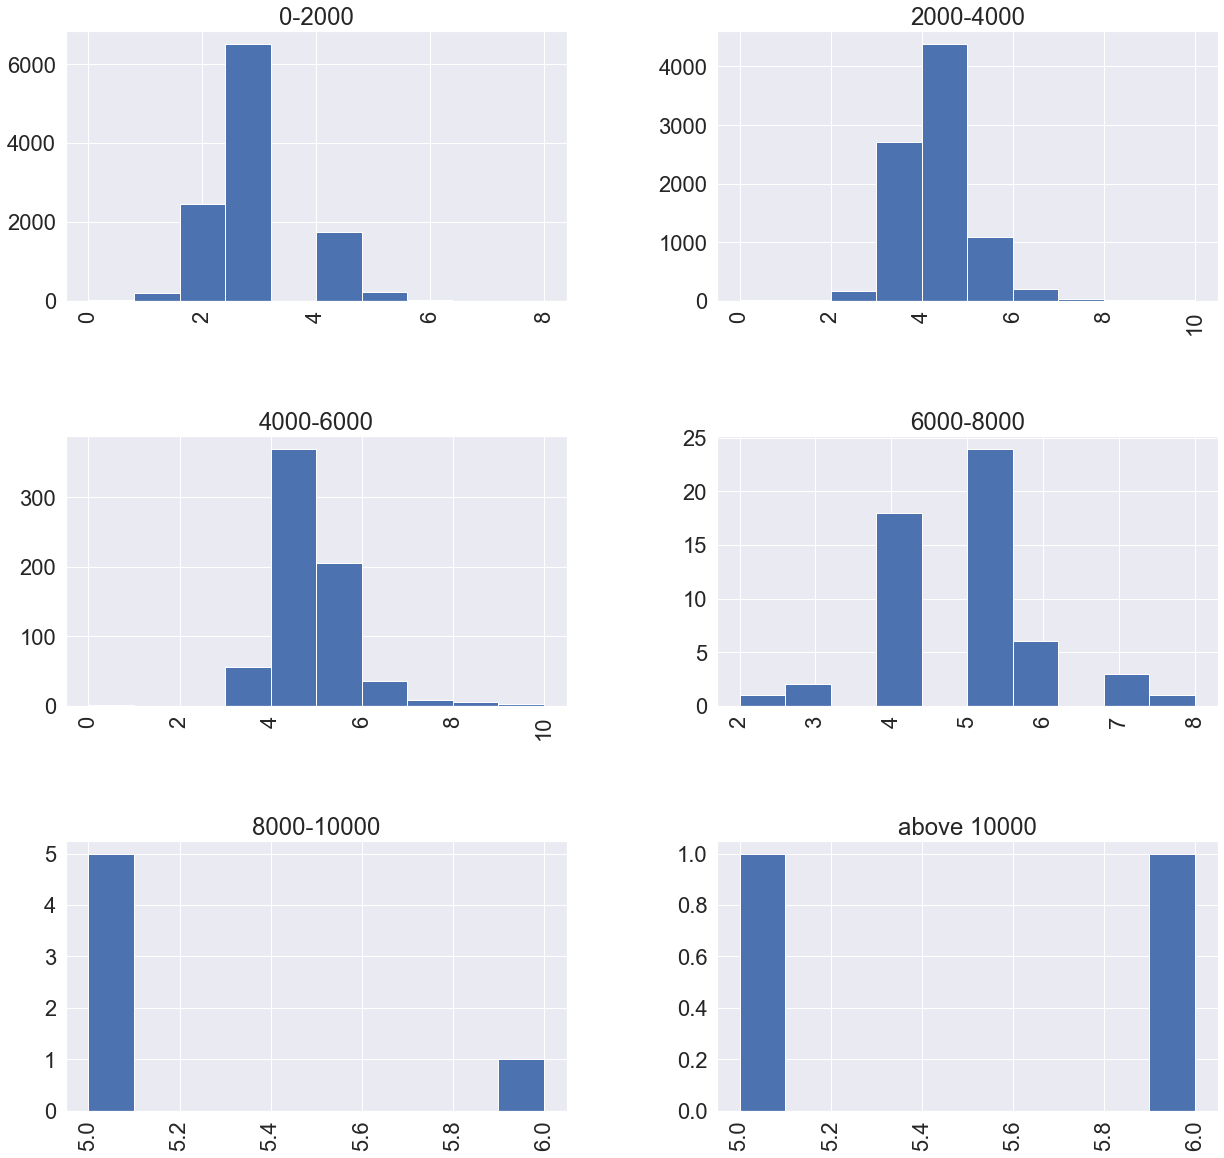

In [666]:
#Now to visualize the bedroom histogram based on sqft_bins
housing_ml['bedrooms'].hist(by=housing_ml['sqft_bins'], figsize = (20,20))

#### I can see I have relatively gaussian distributions except for large sqft homes, meaning these bins are well chosen for bedrooms
#### create a list to append into based on values for sqft_living in the housing df

In [669]:
#Based on the histogram, I will replace Nan bedrooms <=2000 with 3.0, >2000 but <8000, with 4.0 and 8000 or higher with 5.0
bed_assign = []

for row in housing_ml['sqft_living']:
    if row <= 2000:    
        bed_assign.append(3.0)
    elif 2000 < row < 8000:
        bed_assign.append(4.0)
    elif row >= 8000:   
        bed_assign.append(5.0)

In [670]:
housing_ml['bed_assign'] = bed_assign
housing_ml.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_bins,bed_assign
0,7129300520,20141013T000000,221900,3.0,1.00,1180.0,5650.0,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,0-2000,3.0
1,6414100192,20141209T000000,538000,3.0,2.25,2570.0,7242.0,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2000-4000,4.0
2,5631500400,20150225T000000,180000,2.0,1.00,770.0,10000.0,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,0-2000,3.0
3,2487200875,20141209T000000,604000,4.0,3.00,1960.0,5000.0,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,0-2000,3.0
4,1954400510,20150218T000000,510000,3.0,2.00,1680.0,8080.0,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,0-2000,3.0
5,7237550310,20140512T000000,1225000,4.0,4.50,5420.0,101930.0,1.0,0,0,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,4000-6000,4.0
6,1321400060,20140627T000000,257500,3.0,2.25,1715.0,6819.0,2.0,0,0,...,0,1995,0,98003,47.3097,-122.327,2238,6819,0-2000,3.0
7,2008000270,20150115T000000,291850,3.0,1.50,1060.0,9711.0,1.0,0,0,...,0,1963,0,98198,47.4095,-122.315,1650,9711,0-2000,3.0
8,2414600126,20150415T000000,229500,3.0,1.00,1780.0,7470.0,1.0,0,0,...,730,1960,0,98146,47.5123,-122.337,1780,8113,0-2000,3.0
9,3793500160,20150312T000000,323000,3.0,2.50,1890.0,6560.0,2.0,0,0,...,0,2003,0,98038,47.3684,-122.031,2390,7570,0-2000,3.0


#### Now that I have created a column with the bedroom values I want to impute for NaN, I can write a code to copy them

In [671]:
housing_ml.bedrooms.fillna(housing_ml.bed_assign,inplace = True)

In [672]:
#check that the value has been replaced - the 3.0, 4.0 and 5.0 bedrooms should increase
housing_ml['bedrooms'].value_counts().to_frame()

,bedrooms
3.0,9905
4.0,7034
2.0,2617
5.0,1540
6.0,263
1.0,189
7.0,34
8.0,12
0.0,11
9.0,5


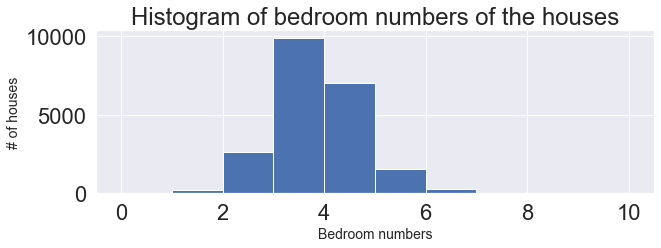

In [673]:
#I want to visualize this result to see if it has a bell shaped curve for distribution
plt.figure(figsize=(10,3))
plt.hist(housing_ml['bedrooms'], bins=10, edgecolor='white')
plt.xlabel('Bedroom numbers', fontsize=14)
plt.ylabel('# of houses', fontsize=14)
plt.title('Histogram of bedroom numbers of the houses')
plt.show()

#### The histogram result is good, so I will keep the values I have calculated and replaced for NaN

In [674]:
#The last variable with missing data is bathrooms
housing_ml.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms        1068
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
sqft_bins           0
bed_assign          0
dtype: int64

#### I will visualize bathrooms in the same way I did for bedrooms, since there is a 0.749 corr between sqtf_living and bathrooms

array([[<AxesSubplot:title={'center':'0-2000'}>,
        <AxesSubplot:title={'center':'2000-4000'}>],
       [<AxesSubplot:title={'center':'4000-6000'}>,
        <AxesSubplot:title={'center':'6000-8000'}>],
       [<AxesSubplot:title={'center':'8000-10000'}>,
        <AxesSubplot:title={'center':'above 10000'}>]], dtype=object)

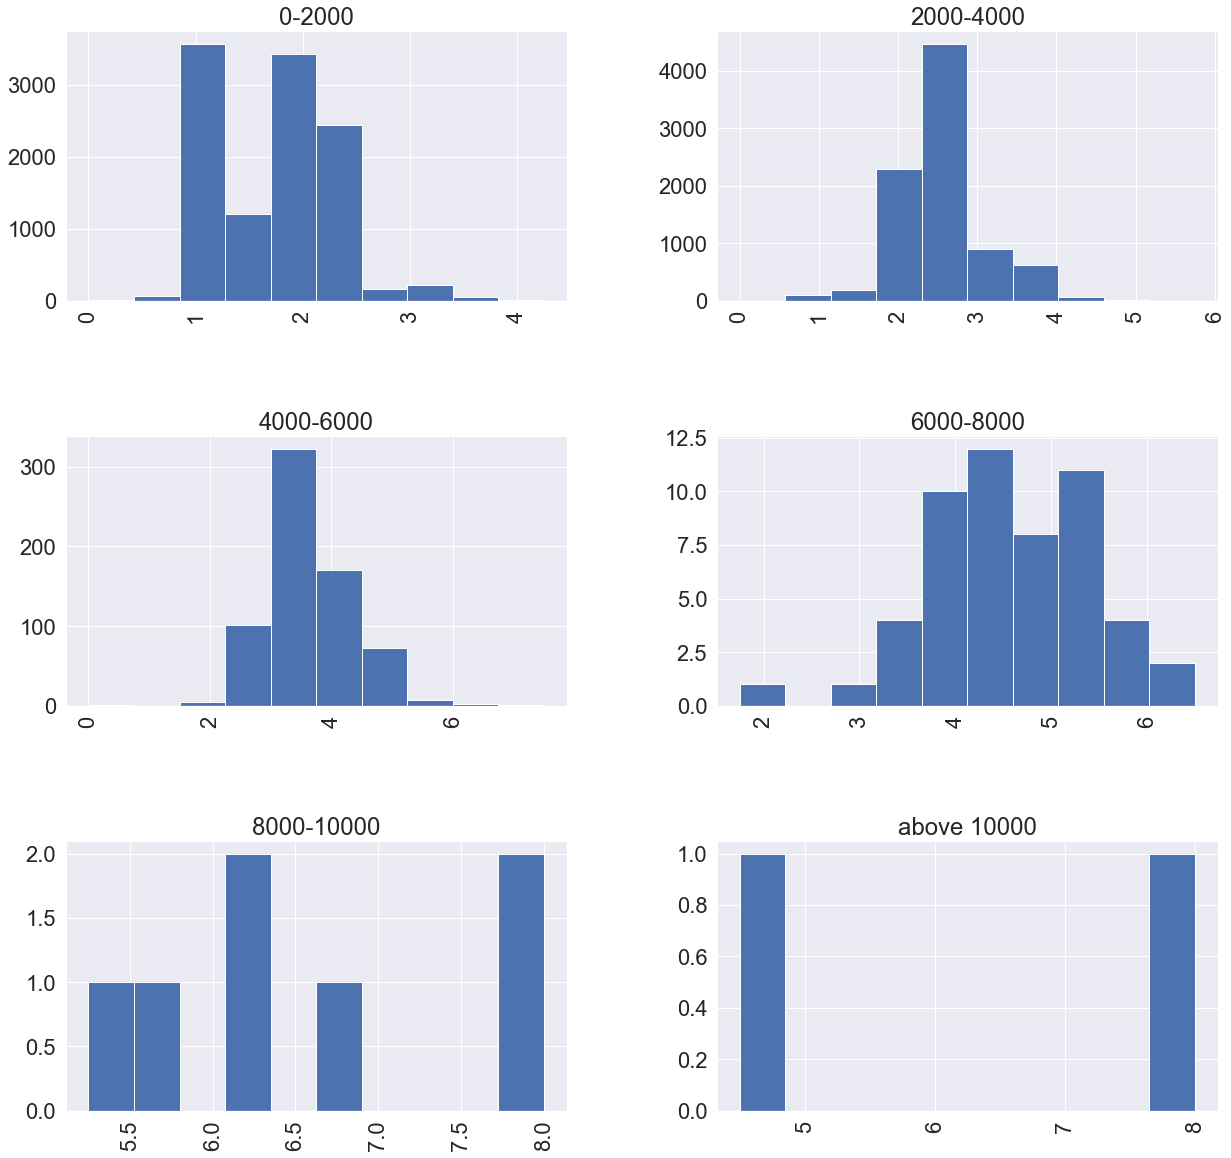

In [675]:
#I find a relatively gaussian distribution except for the large sqft homes, this means I have chosen good bins to visualize bathrooms
housing_ml['bathrooms'].hist(by=housing_ml['sqft_bins'],figsize = (20,20))

In [676]:
#check the values of bathrooms prior to imputing to the NaN values:
housing_ml['bathrooms'].value_counts().to_frame()

,bathrooms
2.50,5115
1.00,3667
1.75,2901
2.25,1951
2.00,1828
1.50,1383
2.75,1121
3.00,713
3.50,690
3.25,558


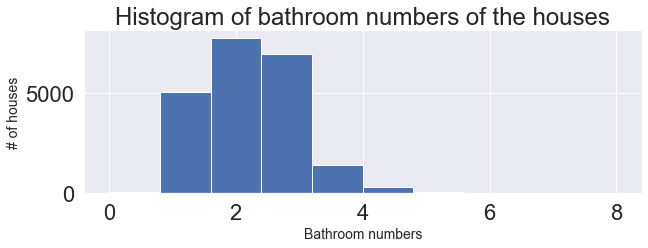

In [677]:
#I want to visualize the bathrooms prior to chaning NaN values to see how the distribution changes
plt.figure(figsize=(10,3))
plt.hist(house_raw['bathrooms'], bins=10, edgecolor='white')
plt.xlabel('Bathroom numbers', fontsize=14)
plt.ylabel('# of houses', fontsize=14)
plt.title('Histogram of bathroom numbers of the houses')
plt.show()

#### It appears to be skewed right, but honestly most homes have 1-3 bedrooms so I think this is an accurate reflection 

In [678]:
# Bathrooms will also have a 3-level approach: 0-6000 = 3 bathrooms, 6000-8000: 4 bathrooms, if above 8000: 6 bathrooms

bath_assign = []

for row in housing_ml['sqft_living']:
    if row < 6000:    
        bath_assign.append(3.0)
    elif 6000 < row < 8000:
        bath_assign.append(4.0)
    elif row >= 8000:   
        bath_assign.append(6.0)

In [679]:
#Check that the code created the df appropriately:
housing_ml['bath_assign'] = bath_assign
housing_ml.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_bins,bed_assign,bath_assign
0,7129300520,20141013T000000,221900,3.0,1.00,1180.0,5650.0,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,0-2000,3.0,3.0
1,6414100192,20141209T000000,538000,3.0,2.25,2570.0,7242.0,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2000-4000,4.0,3.0
2,5631500400,20150225T000000,180000,2.0,1.00,770.0,10000.0,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,0-2000,3.0,3.0
3,2487200875,20141209T000000,604000,4.0,3.00,1960.0,5000.0,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,0-2000,3.0,3.0
4,1954400510,20150218T000000,510000,3.0,2.00,1680.0,8080.0,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,0-2000,3.0,3.0
5,7237550310,20140512T000000,1225000,4.0,4.50,5420.0,101930.0,1.0,0,0,...,2001,0,98053,47.6561,-122.005,4760,101930,4000-6000,4.0,3.0
6,1321400060,20140627T000000,257500,3.0,2.25,1715.0,6819.0,2.0,0,0,...,1995,0,98003,47.3097,-122.327,2238,6819,0-2000,3.0,3.0
7,2008000270,20150115T000000,291850,3.0,1.50,1060.0,9711.0,1.0,0,0,...,1963,0,98198,47.4095,-122.315,1650,9711,0-2000,3.0,3.0
8,2414600126,20150415T000000,229500,3.0,1.00,1780.0,7470.0,1.0,0,0,...,1960,0,98146,47.5123,-122.337,1780,8113,0-2000,3.0,3.0
9,3793500160,20150312T000000,323000,3.0,2.50,1890.0,6560.0,2.0,0,0,...,2003,0,98038,47.3684,-122.031,2390,7570,0-2000,3.0,3.0


In [680]:
#Now that I have created a column with the bathroom values I want to impute for NaN, I can write a code to copy them

housing_ml.bathrooms.fillna(housing_ml.bath_assign,inplace = True)

In [681]:
#check that the value has been replaced - the 3, 4 and 6 bathrooms should increase
housing_ml['bathrooms'].value_counts().to_frame()

,bathrooms
2.50,5115
1.00,3667
1.75,2901
2.25,1951
2.00,1828
3.00,1778
1.50,1383
2.75,1121
3.50,690
3.25,558


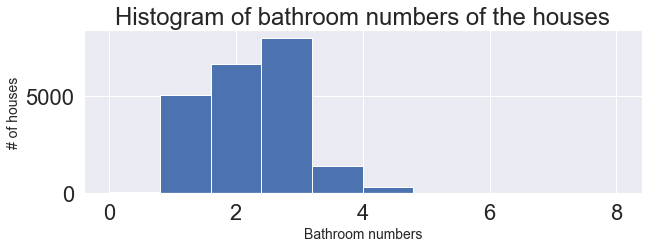

In [682]:
#I want to visualize this result to see if it has a bell shaped curve for distribution after replacing NaN values
plt.figure(figsize=(10,3))
plt.hist(housing_ml['bathrooms'], bins=10, edgecolor='white')
plt.xlabel('Bathroom numbers', fontsize=14)
plt.ylabel('# of houses', fontsize=14)
plt.title('Histogram of bathroom numbers of the houses')
plt.show()

#### The result is very similar to before replacing NaN values meaning I don't think I skewed the accuracy of the data 

In [683]:
#Verify the missing values have all been replaced
housing_ml.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sqft_bins        0
bed_assign       0
bath_assign      0
dtype: int64

## Will now look at the variable 'View'

#### house_raw

#### View = 1 means the house has a view, view = 0 means the house doesn't have a view. 
#### Based on the viariable description, view = 2,3,4 are wrong data entry.
#### We will use 1 to replace the wrong data entry.

In [684]:
house_raw['view'].value_counts().to_frame()

,view
0,19489
2,963
3,510
1,332
4,319


In [685]:
house_raw['view'] = house_raw['view'].replace(2.0, 1.0, regex=True)
house_raw['view'] = house_raw['view'].replace(3.0, 1.0, regex=True)
house_raw['view'] = house_raw['view'].replace(4.0, 1.0, regex=True)
house_raw['view'].value_counts().to_frame()

,view
0,19489
1,2124


In [686]:
house_raw.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.005919,0.002101,-0.011529,-0.130281,0.018525,-0.002721,0.011405,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.309783,0.515365,0.681527,0.086530,0.256794,0.266369,0.359120,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.005919,0.309783,1.000000,0.500483,0.563855,0.028207,0.177992,-0.005037,0.082806,0.025030,0.358322,0.479064,0.298110,0.155478,0.020089,-0.154092,-0.010543,0.131066,0.392331,0.025166
bathrooms,0.002101,0.515365,0.500483,1.000000,0.714307,0.083146,0.487859,0.067113,0.170830,-0.123002,0.648745,0.667757,0.276989,0.495315,0.048536,-0.200677,0.026612,0.218557,0.554516,0.086509
sqft_living,-0.011529,0.681527,0.563855,0.714307,1.000000,0.159695,0.345290,0.105203,0.264924,-0.057751,0.744259,0.850785,0.420720,0.310977,0.055857,-0.193794,0.049893,0.232981,0.736945,0.175089
sqft_lot,-0.130281,0.086530,0.028207,0.083146,0.159695,1.000000,-0.005718,0.020783,0.067403,-0.008757,0.109016,0.176831,0.015346,0.050494,0.008588,-0.127739,-0.085286,0.223731,0.142063,0.717635
floors,0.018525,0.256794,0.177992,0.487859,0.345290,-0.005718,1.000000,0.023698,0.017871,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.005037,0.067113,0.105203,0.020783,0.023698,1.000000,0.264057,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011405,0.359120,0.082806,0.170830,0.264924,0.067403,0.017871,0.264057,1.000000,0.047143,0.237327,0.153325,0.275310,-0.062810,0.095029,0.091213,0.009529,-0.088244,0.273444,0.064345
condition,-0.023783,0.036362,0.025030,-0.123002,-0.057751,-0.008757,-0.263768,0.016653,0.047143,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


#### house_ml approach
#### Will need to allocate the view values based on logistic regression; will change to NaN to distribute the values


In [687]:
#I want to convert the values of 2, 3 and 4 to Nan so I can use ML to repalce the values with 0 or 1 instead of dropping the rows
housing_ml['view'].replace(2 ,np.NaN, inplace = True)
housing_ml['view'].replace(3 ,np.NaN, inplace = True)
housing_ml['view'].replace(4 ,np.NaN, inplace = True)
housing_ml.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view             1792
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
sqft_bins           0
bed_assign          0
bath_assign         0
dtype: int64

In [688]:
#Subset a view dataframe with variables that have a high corr with view
viewdf = housing_ml[['price', 'waterfront', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'grade', 'sqft_basement', 'sqft_living15', 'view']]
viewdf.head()

,price,waterfront,sqft_living,sqft_lot,bedrooms,bathrooms,grade,sqft_basement,sqft_living15,view
0,221900,0,1180.0,5650.0,3.0,1.00,7,0,1340,0.0
1,538000,0,2570.0,7242.0,3.0,2.25,7,400,1690,0.0
2,180000,0,770.0,10000.0,2.0,1.00,6,0,2720,0.0
3,604000,0,1960.0,5000.0,4.0,3.00,7,910,1360,0.0
4,510000,0,1680.0,8080.0,3.0,2.00,8,0,1800,0.0


In [689]:
viewdf.shape

(21613, 10)

In [690]:
test_viewdf= viewdf[viewdf["view"].isnull()]
print(test_viewdf.shape)
test_viewdf.head()

(1792, 10)


,price,waterfront,sqft_living,sqft_lot,bedrooms,bathrooms,grade,sqft_basement,sqft_living15,view
15,650000,0,2950.0,5000.0,4.0,3.00,9,970,2140,NaN
21,2000000,0,3050.0,44867.0,3.0,2.75,9,720,4110,NaN
49,1350000,1,2753.0,65005.0,3.0,2.50,9,588,2680,NaN
58,951000,0,3250.0,14342.0,5.0,3.25,8,0,2960,NaN
60,650000,0,2150.0,21235.0,3.0,2.25,8,560,2570,NaN


In [691]:
#Verify the 1792 NaN values have been dropped
viewdf = viewdf.dropna()
print(viewdf.shape)

(19821, 10)


In [692]:
#Set up the ML model axis
y_train = viewdf['view']
x_train = viewdf.drop('view', axis = 1)
x_test = test_viewdf.drop('view', axis = 1)

In [693]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [694]:
y_pred = lg.predict(x_test)

In [695]:
test_viewdf['y_pred'] = y_pred
test_viewdf

,price,waterfront,sqft_living,sqft_lot,bedrooms,bathrooms,grade,sqft_basement,sqft_living15,view,y_pred
15,650000,0,2950.0,5000.0,4.0,3.00,9,970,2140,NaN,0.0
21,2000000,0,3050.0,44867.0,3.0,2.75,9,720,4110,NaN,0.0
49,1350000,1,2753.0,65005.0,3.0,2.50,9,588,2680,NaN,0.0
58,951000,0,3250.0,14342.0,5.0,3.25,8,0,2960,NaN,0.0
60,650000,0,2150.0,21235.0,3.0,2.25,8,560,2570,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21554,388000,0,2198.0,6222.0,3.0,2.50,8,0,2198,NaN,0.0
21576,3567000,1,4850.0,10584.0,5.0,4.50,10,1310,3470,NaN,1.0
21579,645000,0,1730.0,1229.0,3.0,3.00,9,410,1710,NaN,0.0
21593,1088000,0,4170.0,8142.0,5.0,3.75,10,0,3030,NaN,0.0


In [696]:
test_viewdf['y_pred']=test_viewdf['y_pred'].astype('int')
test_viewdf

,price,waterfront,sqft_living,sqft_lot,bedrooms,bathrooms,grade,sqft_basement,sqft_living15,view,y_pred
15,650000,0,2950.0,5000.0,4.0,3.00,9,970,2140,NaN,0
21,2000000,0,3050.0,44867.0,3.0,2.75,9,720,4110,NaN,0
49,1350000,1,2753.0,65005.0,3.0,2.50,9,588,2680,NaN,0
58,951000,0,3250.0,14342.0,5.0,3.25,8,0,2960,NaN,0
60,650000,0,2150.0,21235.0,3.0,2.25,8,560,2570,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
21554,388000,0,2198.0,6222.0,3.0,2.50,8,0,2198,NaN,0
21576,3567000,1,4850.0,10584.0,5.0,4.50,10,1310,3470,NaN,1
21579,645000,0,1730.0,1229.0,3.0,3.00,9,410,1710,NaN,0
21593,1088000,0,4170.0,8142.0,5.0,3.75,10,0,3030,NaN,0


In [697]:
housing_ml['view'].fillna(test_viewdf['y_pred'], inplace = True)
housing_ml.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sqft_bins        0
bed_assign       0
bath_assign      0
dtype: int64

#### I will drop some rows now that are not beneficial for future analysis, such as the columns I added and 'id'

In [698]:
housing_ml.drop(["id", "bed_assign", "bath_assign", "sqft_bins"], axis = 1, inplace = True)
housing_ml.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900,3.0,1.00,1180.0,5650.0,1.0,0,0.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000,3.0,2.25,2570.0,7242.0,2.0,0,0.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000,2.0,1.00,770.0,10000.0,1.0,0,0.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000,4.0,3.00,1960.0,5000.0,1.0,0,0.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000,3.0,2.00,1680.0,8080.0,1.0,0,0.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Lastly will update the date column to reflect an appropriate date-time as well as parsing it into year, month, day

In [699]:
housing_ml["date"] = pd.to_datetime(housing_ml.date)
housing_ml["year"] = housing_ml.date.dt.year
housing_ml["month"] = housing_ml.date.dt.month
housing_ml["day"] = housing_ml.date.dt.day
housing_ml["day_of_week"] = housing_ml.date.dt.day_name()

# Part 2: Data Visualization:

### 2.1 Bedroom numbers of the house 
#### housing_raw

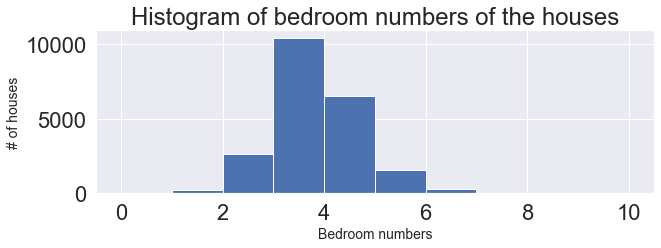

In [700]:
# Using histogram to identify the distribution of bedrooms per home
plt.figure(figsize=(10,3))
plt.hist(house_raw['bedrooms'], bins=10, edgecolor='white')
plt.xlabel('Bedroom numbers', fontsize=14)
plt.ylabel('# of houses', fontsize=14)
plt.title('Histogram of bedroom numbers of the houses')
plt.show()

#### housing_ml

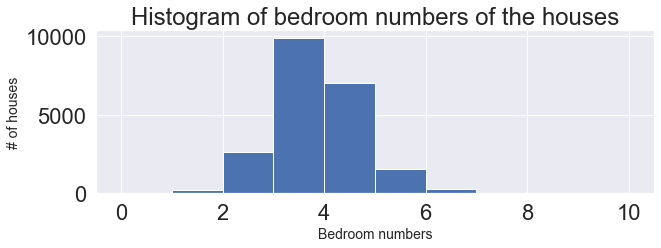

In [701]:
plt.figure(figsize=(10,3))
plt.hist(housing_ml['bedrooms'], bins=10, edgecolor='white')
plt.xlabel('Bedroom numbers', fontsize=14)
plt.ylabel('# of houses', fontsize=14)
plt.title('Histogram of bedroom numbers of the houses')
plt.show()

In [702]:
house_raw['bedrooms'].describe()


count    21613.000000
mean         3.351872
std          0.887140
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: bedrooms, dtype: float64

In [703]:
housing_ml['bedrooms'].describe()

count    21613.000000
mean         3.375792
std          0.890856
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: bedrooms, dtype: float64

#### Thus we know, a houses with 3 rooms is the most popular home type for both approaches
#### Next let's see the bedroom numbers and their prices

#### bedroom_raw

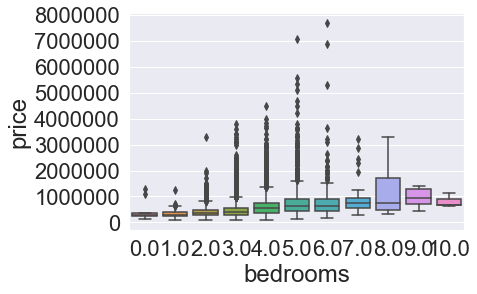

In [704]:
sns.boxplot(x="bedrooms", y="price", data=house_raw)
plt.ticklabel_format(style='plain', axis='y')
sns.set(rc={'figure.figsize':(20,10)})

#### bedroom_ml

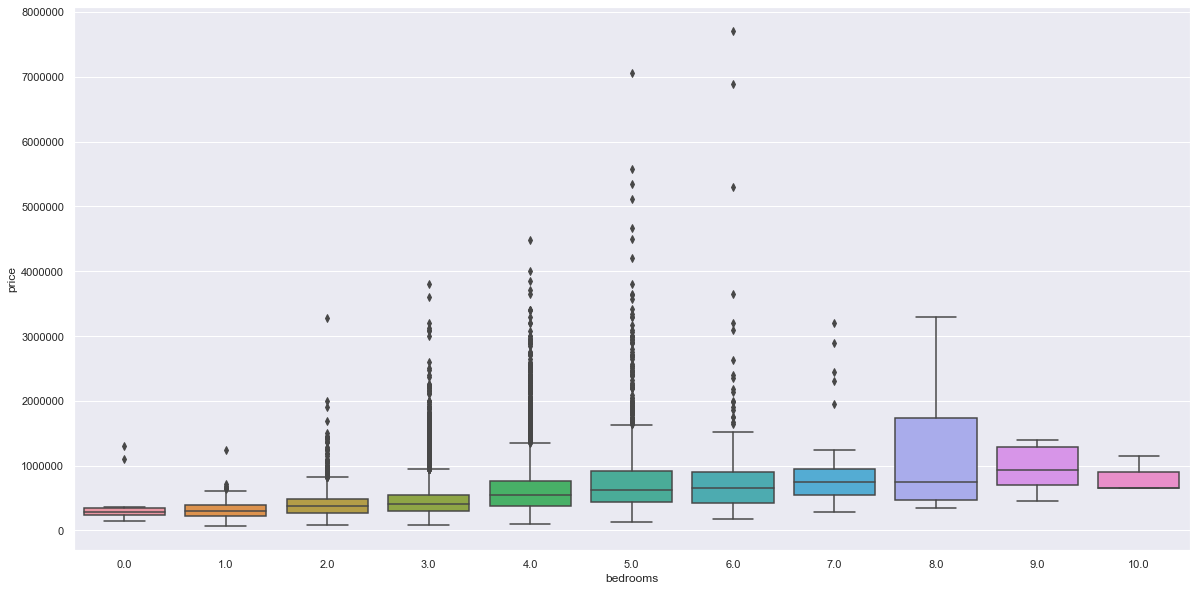

In [705]:
sns.boxplot(x="bedrooms", y="price", data=housing_ml)
plt.ticklabel_format(style='plain', axis='y')
sns.set(rc={'figure.figsize':(20,10)})

#### bedroom_raw

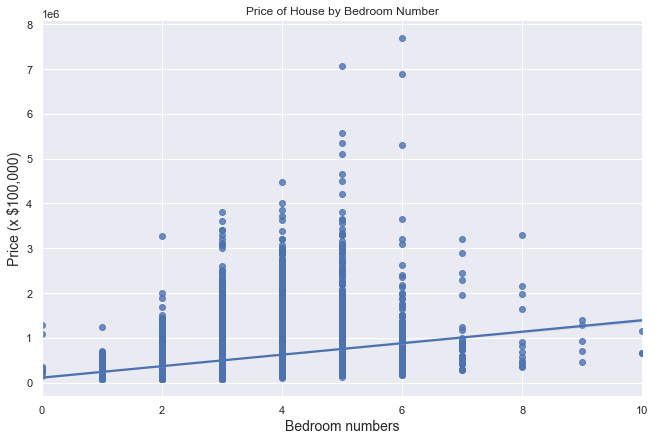

In [706]:
sns.lmplot(x ="bedrooms", y ="price", data = house_raw,
height=6, aspect=1.5)
plt.xlabel('Bedroom numbers', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('Price of House by Bedroom Number')
plt.show()


#### bedroom_ml

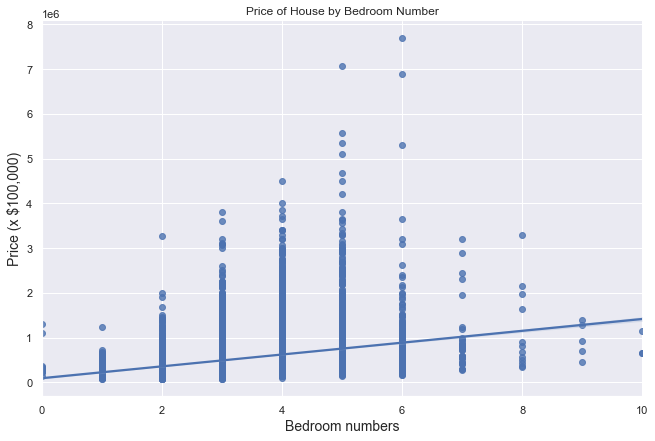

In [707]:
sns.lmplot(x ="bedrooms", y ="price", data = housing_ml,
height=6, aspect=1.5)
plt.xlabel('Bedroom numbers', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('Price of House by Bedroom Number')
plt.show()

### 2.2 Bathroom numbers

#### bathroom_raw

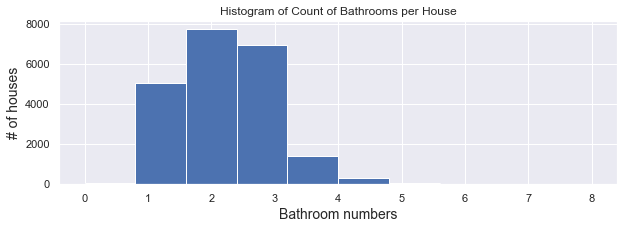

In [708]:
# Using histogram to identify how many bedrooms is the most popular home type
plt.figure(figsize=(10,3))
plt.hist(house_raw['bathrooms'], bins=10, edgecolor='white')
plt.xlabel('Bathroom numbers', fontsize=14)
plt.ylabel('# of houses', fontsize=14)
plt.title('Histogram of Count of Bathrooms per House')
plt.show()

#### bathroom_ml

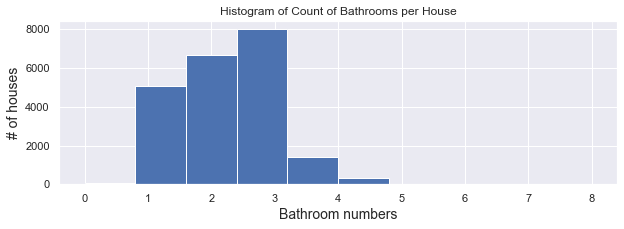

In [709]:
plt.figure(figsize=(10,3))
plt.hist(housing_ml['bathrooms'], bins=10, edgecolor='white')
plt.xlabel('Bathroom numbers', fontsize=14)
plt.ylabel('# of houses', fontsize=14)
plt.title('Histogram of Count of Bathrooms per House')
plt.show()

#### The bathroom difference is more pronounced for ml vs raw approaches

#### bathroom_raw

In [710]:
print(bathroom_raw.describe())
print(bathroom_raw.mode())

count    21613.000000
mean         2.120252
std          0.750257
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64
0    2.5
dtype: float64


#### bathroom average is 2.12 and most common is 2.5

#### bathroom_ml

In [711]:
print(bathroom_ml.describe())
print(bathroom_ml.mode())

count    21613.000000
mean         2.157452
std          0.774145
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64
0    2.5
dtype: float64


#### bathroom average is 2.15 and most common is 2.5, not very different from house_raw at all

#### bathroom_raw

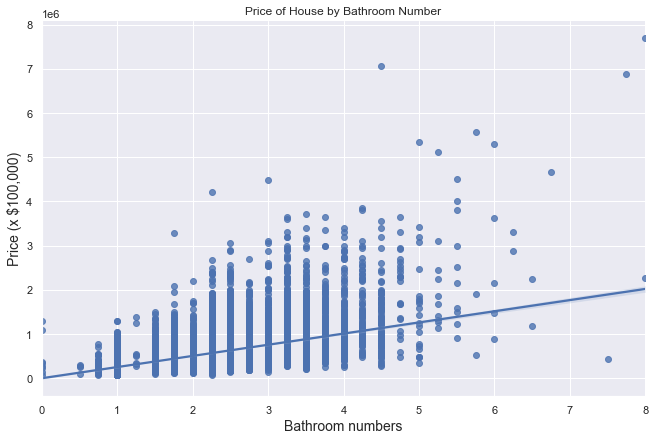

In [712]:
sns.lmplot(x ="bathrooms", y ="price", data = house_raw,
height=6, aspect=1.5)
plt.xlabel('Bathroom numbers', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('Price of House by Bathroom Number')
plt.show()

#### bathroom_ml

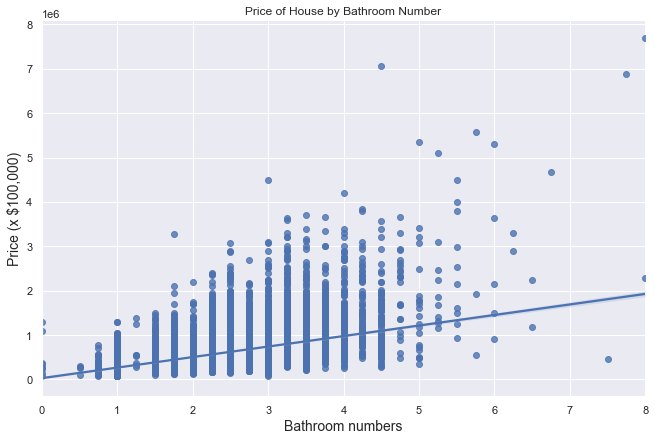

In [713]:
sns.lmplot(x ="bathrooms", y ="price", data = housing_ml,
height=6, aspect=1.5)
plt.xlabel('Bathroom numbers', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('Price of House by Bathroom Number')
plt.show()

### 2.3 Living squarefeet of the house:

#### house_raw

In [714]:
house_raw['sqft_living'].value_counts().to_frame()

,sqft_living
1920.0,1200
1300.0,132
1400.0,130
1440.0,129
1660.0,125
...,...
1894.0,1
2005.0,1
3064.0,1
1798.0,1


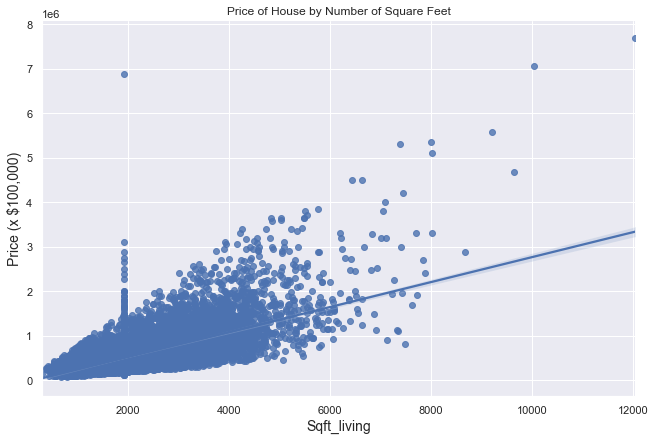

In [715]:
sns.lmplot(x ="sqft_living", y ="price", data = house_raw,
height=6, aspect=1.5)
plt.xlabel('Sqft_living', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('Price of House by Number of Square Feet')
plt.show()

#### housing_ml

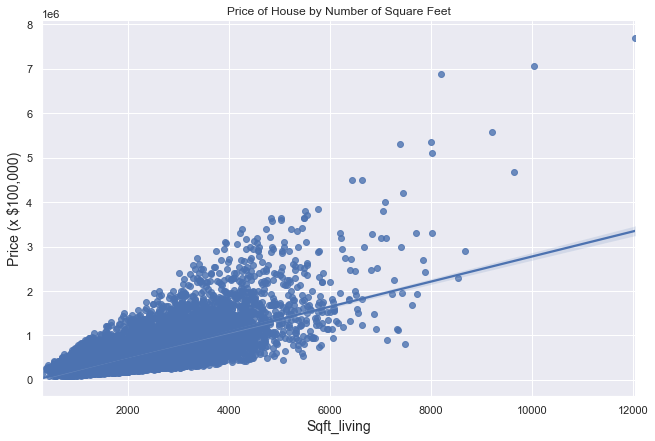

In [716]:
sns.lmplot(x ="sqft_living", y ="price", data = housing_ml,
height=6, aspect=1.5)
plt.xlabel('Sqft_living', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('Price of House by Number of Square Feet')
plt.show()

#### From the above graph we can know the living sqft is positive coorelated with the house price.

### 2.4 sqft_lot of the house:

#### house_raw
#### Since sqft_lot was so similar between the two, will only show house_raw for visualization

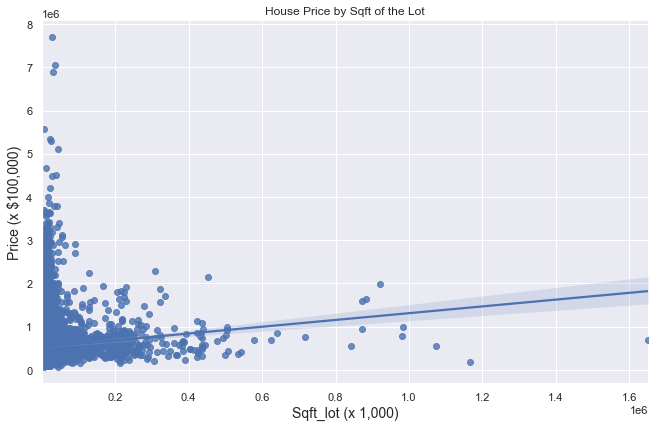

In [717]:

sns.lmplot(x ='sqft_lot', y ="price", data = house_raw,
height=6, aspect=1.5)
plt.xlabel('Sqft_lot (x 1,000)', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('House Price by Sqft of the Lot')
plt.show()

### 2.5 Floor number and the house  price:

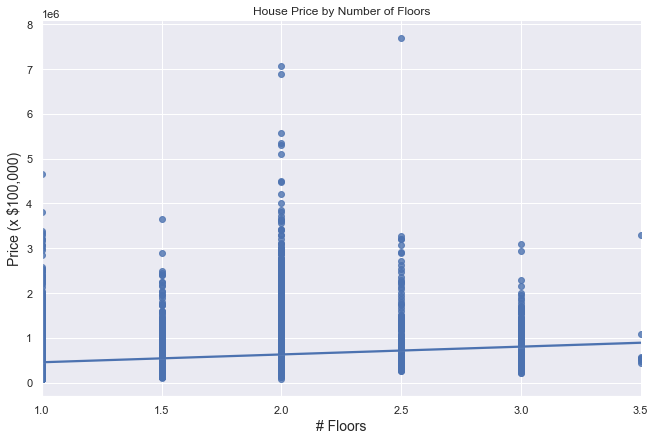

In [718]:
sns.lmplot(x ="floors", y ="price", data = house_raw,
height=6, aspect=1.5)
plt.xlabel('# Floors', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('House Price by Number of Floors')
plt.show()

#### Thus we can tell, the floor numbers has a  week positive correlation with the house price. 
#### The most popular floor number is 2.

### 2.6 Water front:

#### 1 means the house has a water front. 0 means the house doesn't have a water front.
#### house_raw

In [719]:
house_raw['waterfront'].value_counts().to_frame()

,waterfront
0,21450
1,163


#### house_ml

In [720]:
house_ml['waterfront'].value_counts().to_frame()

,waterfront
0,21343
1,124


#### Since the numbers are so similar, will only show house_raw

In [722]:
#### Let's first create two new tables that one is with waterfront, but one is not
with_waterfront = house_raw[house_raw['waterfront'] == 1]
no_waterfront = house_raw[house_raw['waterfront'] == 0]
with_waterfront_price_mean = with_waterfront['price'].mean()
print("Houses with waterfront average price is ", with_waterfront_price_mean,"$")
no_waterfront_price_mean = no_waterfront['price'].mean()
print("Houses that has no basement average price is", no_waterfront_price_mean,"$")

Houses with waterfront average price is  1661876.0245398772 $
Houses that has no basement average price is 531563.5998135199 $


In [723]:
# Crate a dataframe:
data_waterfront = [with_waterfront_price_mean, 'With Waterfront'], [no_waterfront_price_mean, 'No Waterfront']
# Create the pandas DataFrame
waterfront = pd.DataFrame(data_waterfront, columns=['Avg_Price', 'Waterfront'])
# print dataframe.
waterfront

,Avg_Price,Waterfront
0,1.661876e+06,With Waterfront
1,5.315636e+05,No Waterfront


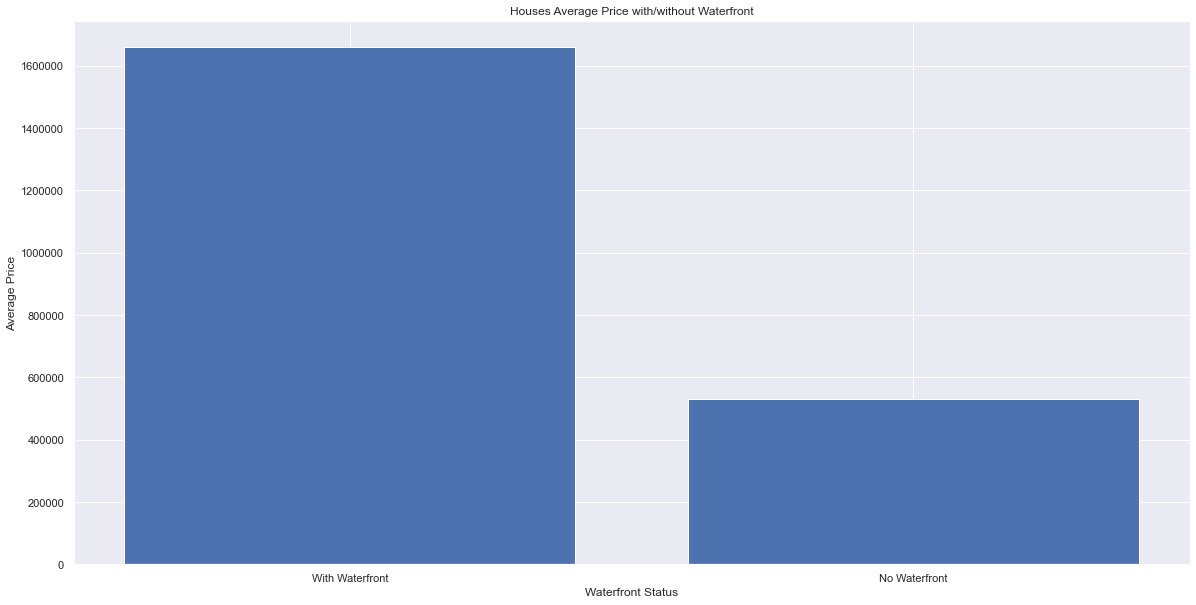

In [724]:
plt.xlabel("Waterfront Status")
plt.ylabel("Average Price")
plt.bar(waterfront['Waterfront'], waterfront['Avg_Price'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("Houses Average Price with/without Waterfront")
plt.show()

### 2.7 View:

#### Based on the description, view is 0 means the house has no view, view is 1 means the house has view.
#### house_raw

In [725]:
with_view = house_raw[house_raw['view'] == 1]
no_view = house_raw[house_raw['view'] == 0]
with_view_price_mean = with_view['price'].mean()
print("Houses with view average price is ", with_view_price_mean,"$")
no_view_price_mean = no_view['price'].mean()
print("Houses that has no view average price is", no_view_price_mean,"$")

Houses with view average price is  939447.0188323917 $
Houses that has no view average price is 496564.19210836885 $


#### housing_ml

In [726]:
with_view = housing_ml[housing_ml['view'] == 1]
no_view = housing_ml[housing_ml['view'] == 0]
with_view_price_mean = with_view['price'].mean()
print("Houses with view average price is ", with_view_price_mean,"$")
no_view_price_mean = no_view['price'].mean()
print("Houses that has no view average price is", no_view_price_mean,"$")

Houses with view average price is  979726.5371428571 $
Houses that has no view average price is 532851.4659267272 $


#### housing_ml and house_raw were very similar (housing_ml slightly higher mean).  Will only show house_raw
#### housing_raw

In [727]:
# Crate a dataframe:
data_view = [with_view_price_mean, 'With View'], [no_view_price_mean, 'No View']
# Create the pandas DataFrame
view = pd.DataFrame(data_view, columns=['Avg_Price', 'View'])
# print dataframe.
view

,Avg_Price,View
0,979726.537143,With View
1,532851.465927,No View


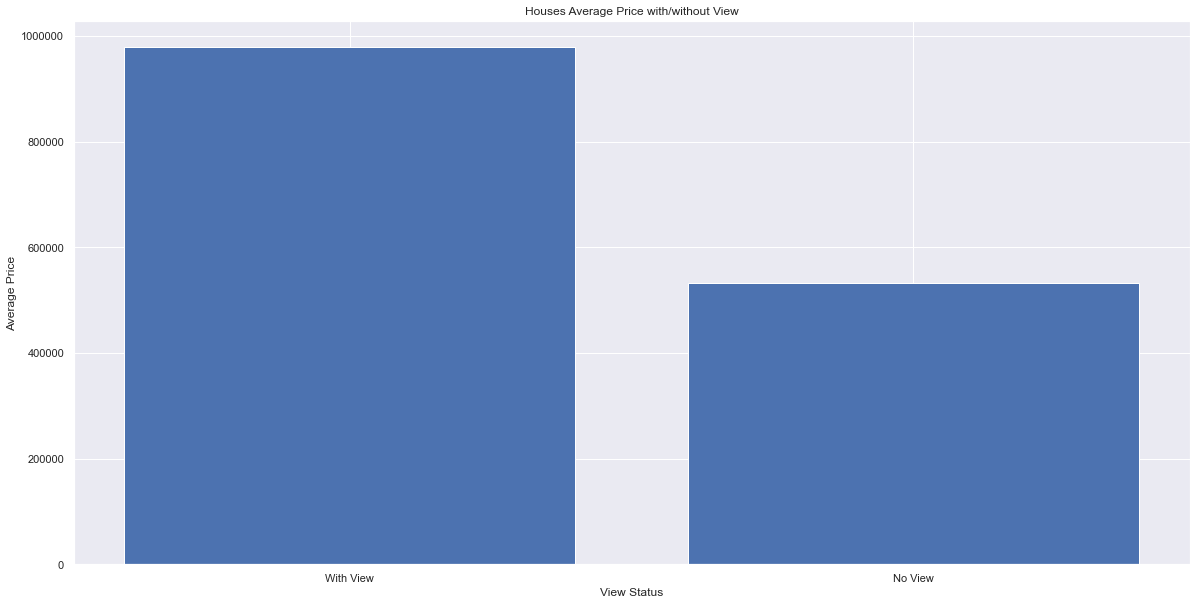

In [728]:
plt.xlabel("View Status")
plt.ylabel("Average Price")
plt.bar(view['View'], view['Avg_Price'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("Houses Average Price with/without View")
plt.show()

### 2.8 Condition of the house
#### housing_raw

In [729]:
house_raw['condition'].value_counts().to_frame()

,condition
3,14031
4,5679
5,1701
2,172
1,30


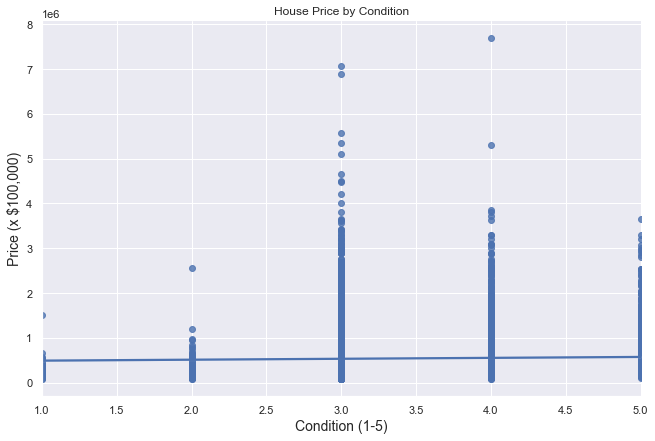

In [730]:
sns.lmplot(x ="condition", y ="price", data = house_raw,
height=6, aspect=1.5)
plt.xlabel('Condition (1-5)', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('House Price by Condition')
plt.show()

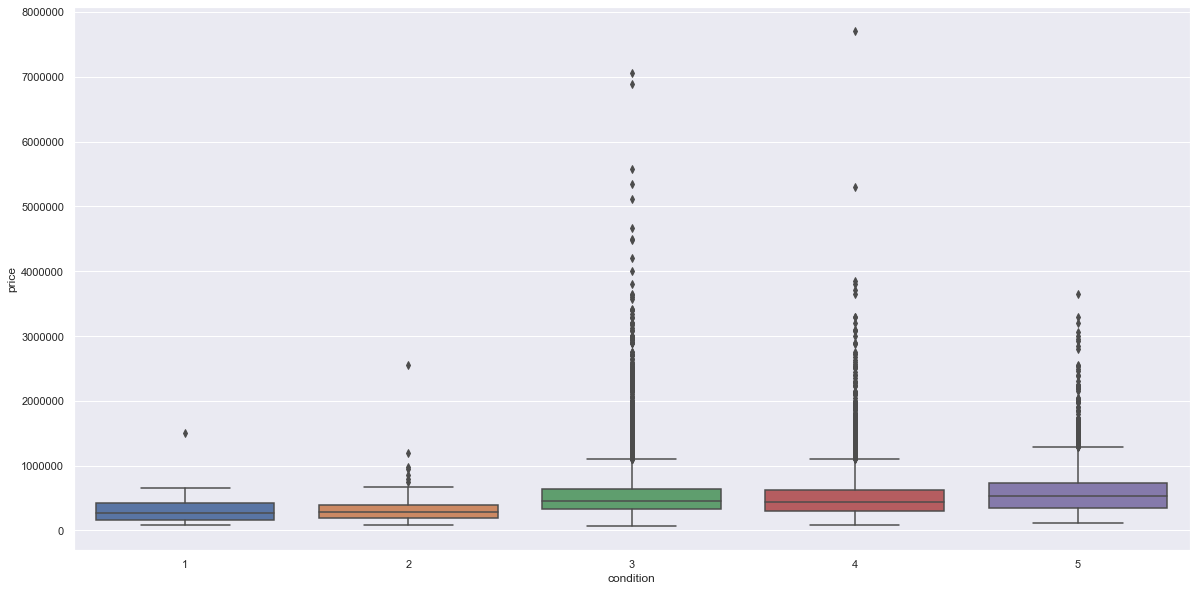

In [731]:
sns.boxplot(x="condition", y="price", data=house_raw)
plt.ticklabel_format(style='plain', axis='y')
sns.set(rc={'figure.figsize':(20,10)})

#### Thus, cannot tell the condition is really affect the house price.

### 2.9 Grade of the house
#### house_raw

In [732]:
house_raw['grade'].value_counts().to_frame()

,grade
7,8981
8,6068
9,2615
6,2038
10,1134
11,399
5,242
12,90
4,29
13,13


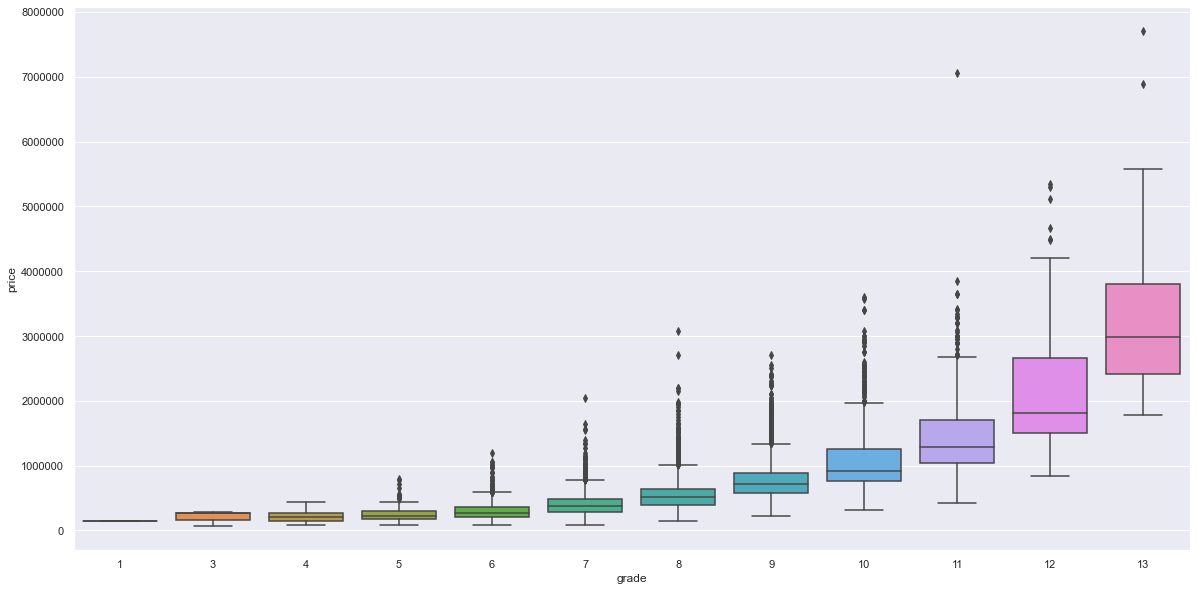

In [733]:
sns.boxplot(x="grade", y="price", data=house_raw)
plt.ticklabel_format(style='plain', axis='y')
sns.set(rc={'figure.figsize':(20,10)})

### 2.10 Year built of the house
#### house_raw

In [734]:
house_raw['yr_built'].value_counts().to_frame()

,yr_built
2014,559
2006,454
2005,450
2004,433
2003,422
...,...
1933,30
1901,29
1902,27
1935,24


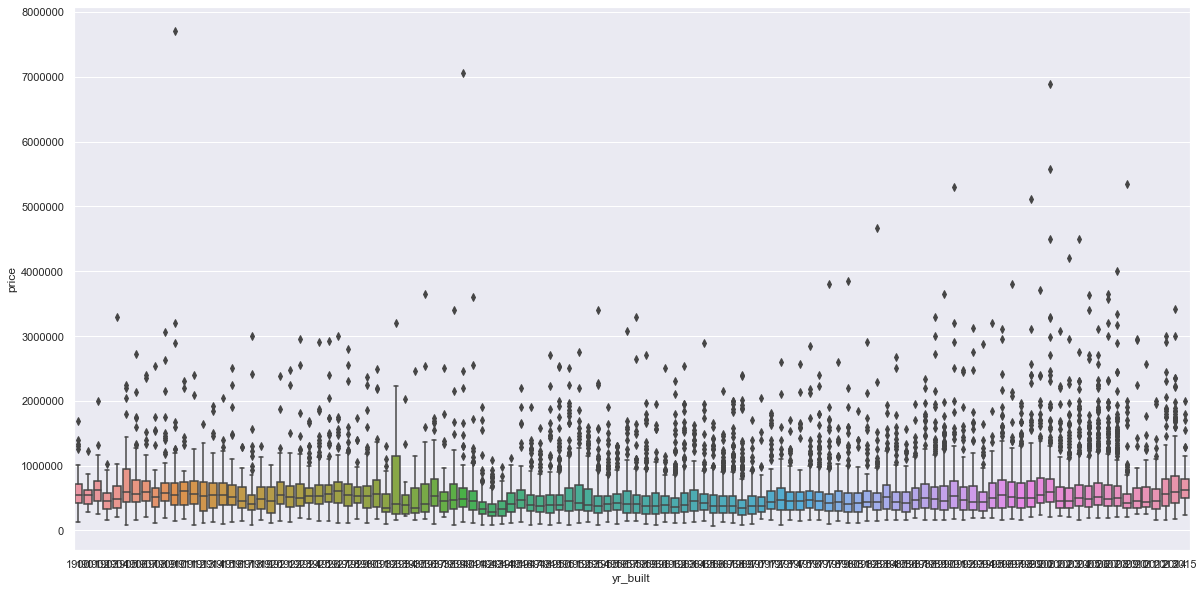

In [735]:
sns.boxplot(x="yr_built", y="price", data=house_raw)
plt.ticklabel_format(style='plain', axis='y')
sns.set(rc={'figure.figsize':(20,10)})

Text(0.5, 1.0, 'Median Price by Year Built')

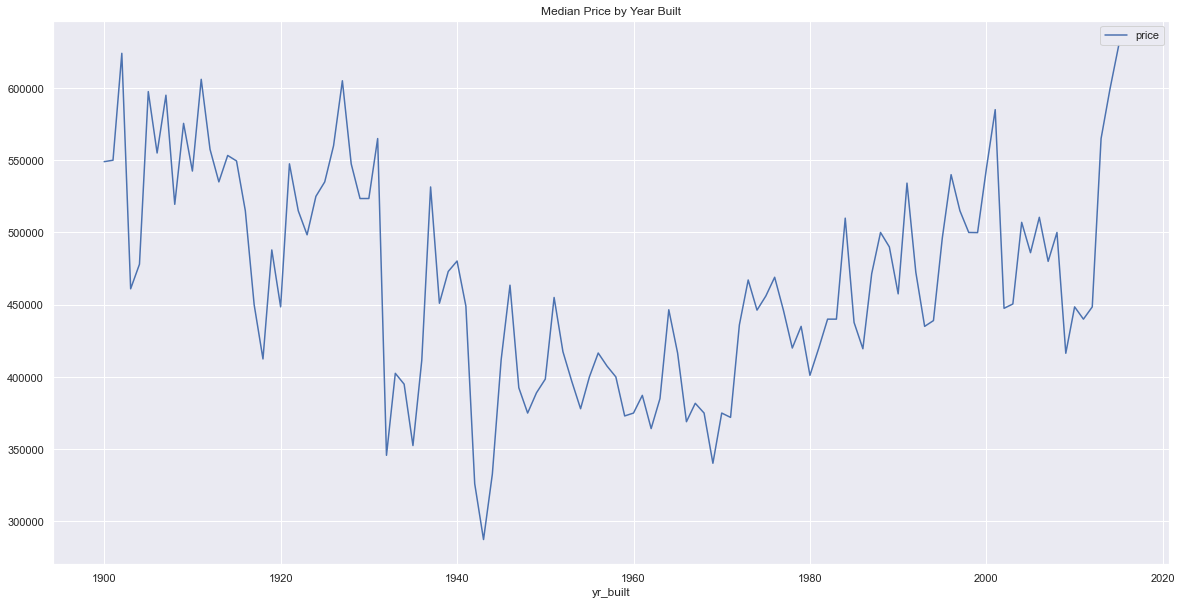

In [736]:
# Get the median price by the year and plot them:
price_year = house_raw[['yr_built','price'] ]
price_year
price_year.groupby(['yr_built'])['price'].median().plot(legend = True)
plt.title("Median Price by Year Built")

#### from the above 2 images, we can tell the year built and the house price are not positively correlated

### 2.11 Renovation Status of the house
#### house_raw

In [737]:
#### Let's first create two new tables that one is renovated before, but one is not
new_reno = house_raw[house_raw['yr_renovated'] != 0]
no_reno = house_raw[house_raw['yr_renovated'] == 0]
new_reno_price_mean = new_reno['price'].median()
print("Renovated house average price is ", new_reno_price_mean,"$")
no_reno_price_mean = no_reno['price'].median()
print("Non-renovated house average price is", no_reno_price_mean,"$")

Renovated house average price is  600000.0 $
Non-renovated house average price is 448000.0 $


#### housing_ml

In [738]:
new_reno = housing_ml[housing_ml['yr_renovated'] != 0]
no_reno = housing_ml[housing_ml['yr_renovated'] == 0]
new_reno_price_mean = new_reno['price'].median()
print("Renovated house average price is ", new_reno_price_mean,"$")
no_reno_price_mean = no_reno['price'].median()
print("Non-renovated house average price is", no_reno_price_mean,"$")

Renovated house average price is  600000.0 $
Non-renovated house average price is 448000.0 $


#### These are the same because renovation status was not changed in data wrangling.  Will only show house_raw

In [739]:
# Crate a dataframe:
data_reno = [new_reno_price_mean, 'With Renovation'], [no_reno_price_mean, 'No Removation']
# Create the pandas DataFrame
reno = pd.DataFrame(data_reno, columns=['Avg_Price', 'Status'])
# print dataframe.
reno

,Avg_Price,Status
0,600000.0,With Renovation
1,448000.0,No Removation


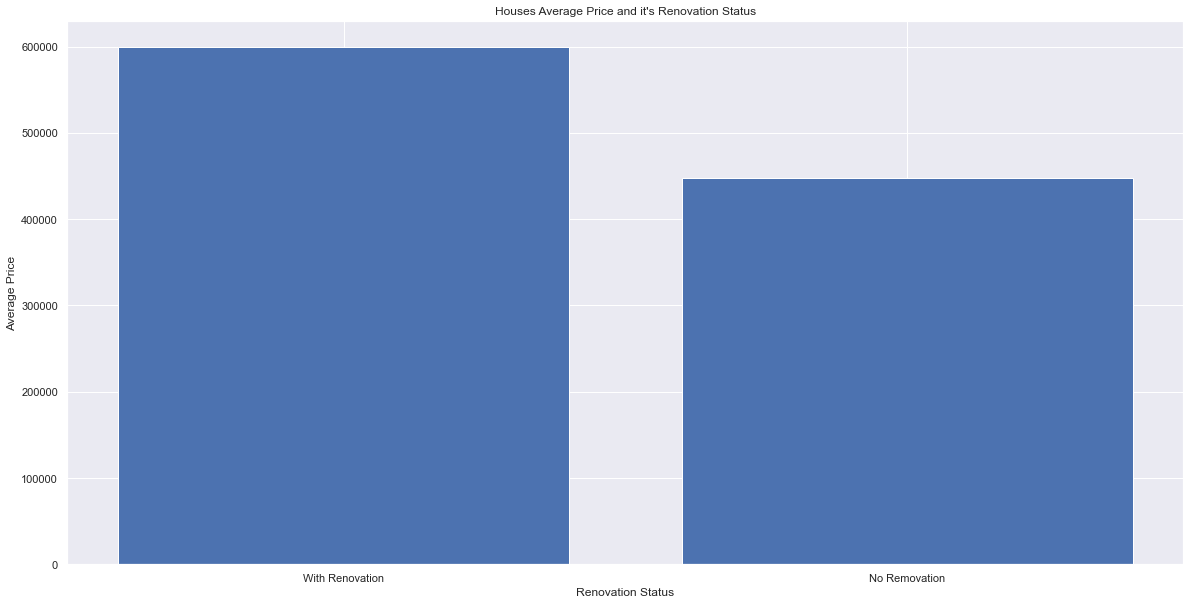

In [740]:
# Generate a bar plot to better shows the price difference:
plt.xlabel("Renovation Status")
plt.ylabel("Average Price")
plt.bar(reno['Status'], reno['Avg_Price'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("Houses Average Price and it's Renovation Status")
plt.show()

### 2.12 Zip code and it's price:
#### Will only show house_raw since no modifications were made between datasets

In [741]:
house_raw['zipcode'].value_counts().to_frame()

,zipcode
98103,602
98038,590
98115,583
98052,574
98117,553
...,...
98102,105
98010,100
98024,81
98148,57


In [742]:
zip_price_mean = house_raw['zipcode'].median()
print("Renovated houses average price is ", new_reno_price_mean,"$")
no_reno_price_mean = no_reno['price'].median()
print("Houses that not renvated average price is", no_reno_price_mean,"$")

Renovated houses average price is  600000.0 $
Houses that not renvated average price is 448000.0 $


In [743]:
zip_data = house_raw[['zipcode', 'price']]
zip_data

,zipcode,price
0,98178,221900
1,98125,538000
2,98028,180000
3,98136,604000
4,98074,510000
...,...,...
21608,98103,360000
21609,98146,400000
21610,98144,402101
21611,98027,400000


In [744]:
zip_price = zip_data.groupby(['zipcode']).median()
zip_price

,price
zipcode,
98001,260000.0
98002,235000.0
98003,267475.0
98004,1150000.0
98005,765475.0
...,...
98177,554000.0
98178,278277.0
98188,264000.0


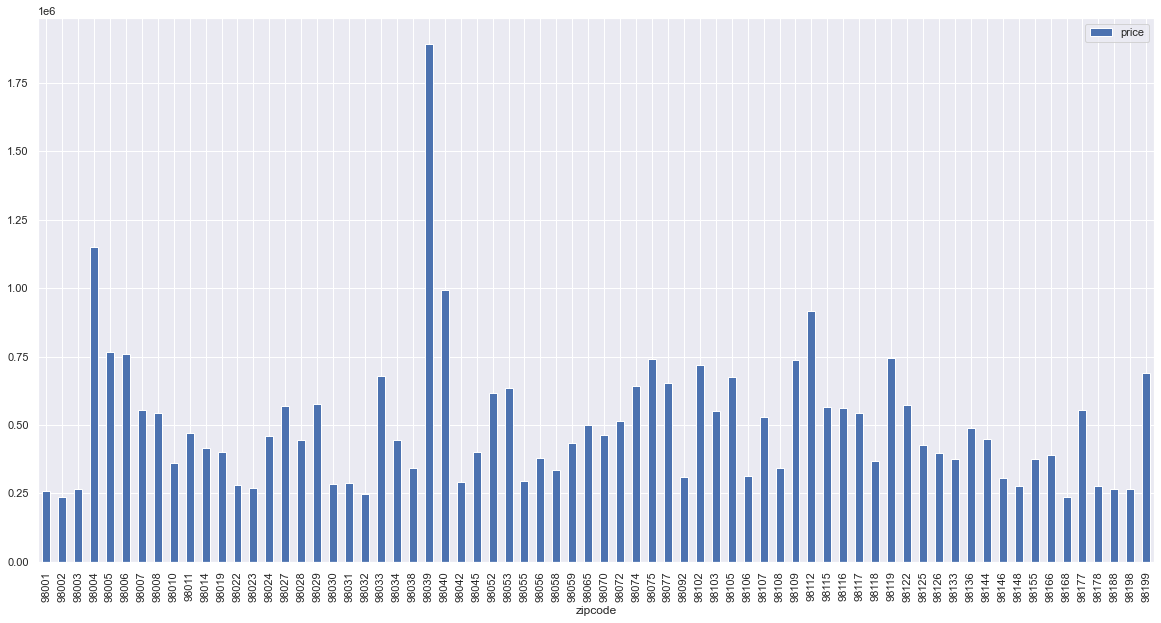

In [745]:
zip_price.groupby('zipcode')['price'].median().plot(kind = 'bar', legend=True )
plt.show()

### 2.13 House price and it's Geo location
#### house_raw

In [746]:
map = house_raw[['price','lat', 'long'] ]
map.describe()

,price,lat,long
count,2.161300e+04,21613.000000,21613.000000
mean,5.400881e+05,47.560053,-122.213896
std,3.671272e+05,0.138564,0.140828
min,7.500000e+04,47.155900,-122.519000
25%,3.219500e+05,47.471000,-122.328000
50%,4.500000e+05,47.571800,-122.230000
75%,6.450000e+05,47.678000,-122.125000
max,7.700000e+06,47.777600,-121.315000


### Remove outliers
#### house_raw

In [747]:
# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
map2 = map[(map['price'] >= np.percentile(map['price'], 0.5)) & 
 (map['price'] <= np.percentile(map['price'], 99.5)) & 
 (map['lat'] >= np.percentile(map['lat'], 0.05)) & 
 (map['lat'] < np.percentile(map['lat'], 99.95)) &
 (map['long'] >= np.percentile(map['long'], 0.05)) & 
 (map['long'] <= np.percentile(map['long'], 99.95))]
map2.describe()

,price,lat,long
count,2.135100e+04,21351.000000,21351.000000
mean,5.290363e+05,47.560417,-122.213852
std,3.074869e+05,0.138371,0.139595
min,1.340000e+05,47.184000,-122.505000
25%,3.248940e+05,47.471300,-122.328000
50%,4.500000e+05,47.571900,-122.229000
75%,6.400000e+05,47.678300,-122.124000
max,2.450000e+06,47.777000,-121.402000


#### housing_ml

In [748]:
#The interquartile range is:
Q3 = np.quantile(housing_ml['price'], 0.75)
Q1 = np.quantile(housing_ml['price'], 0.25)
IQR = Q3 - Q1
 
print("IQR value for column price is", (IQR))

IQR value for column price is 323050.0


In [749]:
#It seems there are some outliers in price.  I want to look at these more closely
outlier_list = []
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
for x in housing_ml['price']: 
        if ((x < lower_range) or (x > upper_range)):
            outlier_list.append(x)
    
outliers = pd.DataFrame(outlier_list)
print(outliers)

            0
0     1225000
1     2000000
2     1350000
3     1325000
4     1450000
...       ...
1141  1700000
1142  3567000
1143  1222500
1144  1575000
1145  1537000

[1146 rows x 1 columns]


In [750]:
#This analysis produces a lot of results, I am going to try 5x IQR to narrow down high outliers
outlier_list = []
lower_range = Q1 - 5 * IQR
upper_range = Q3 + 5 * IQR
for x in housing_ml['price']: 
        if ((x < lower_range) or (x > upper_range)):
            outlier_list.append(x)
    
outliers = pd.DataFrame(outlier_list)
print(outliers)

           0
0    2400000
1    2900000
2    3075000
3    2384000
4    3070000
..       ...
141  2300000
142  2900000
143  2351960
144  3000000
145  3567000

[146 rows x 1 columns]


In [751]:
#I want to subset the outliers so I can eventually see how different they are to the original
housing_outliers = housing_ml[housing_ml['price'].isin(outlier_list)]
print(housing_outliers)

            date    price  bedrooms  bathrooms  sqft_living     sqft_lot  \
246   2014-09-29  2400000       4.0       2.50       3650.0   8354.00000   
269   2015-05-04  2900000       4.0       3.25       5050.0  23099.16548   
300   2014-06-24  3075000       4.0       5.00       4550.0  18641.00000   
312   2014-05-02  2384000       5.0       2.50       3650.0   9050.00000   
656   2014-11-20  3070000       3.0       2.50       3930.0  55867.00000   
...          ...      ...       ...        ...          ...          ...   
20767 2015-04-17  2300000       4.0       4.00       4360.0   8175.00000   
21040 2014-11-13  2900000       5.0       4.00       5190.0  14600.00000   
21310 2014-07-03  2351960       4.0       4.25       5010.0  19412.00000   
21530 2015-04-07  3000000       4.0       3.75       5090.0  14823.00000   
21576 2015-01-07  3567000       5.0       4.50       4850.0  10584.00000   

       floors  waterfront  view  condition  ...  yr_renovated  zipcode  \
246       1.0

In [752]:
#If I drop the outliers (#146) from the whole dataset (#21613) this represents only 0.7% of the data
house_ml= housing_ml[~housing_ml.price.isin(outlier_list)]
house_ml.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,day_of_week
0,2014-10-13,221900,3.0,1.00,1180.0,5650.0,1.0,0,0.0,3,...,0,98178,47.5112,-122.257,1340,5650,2014,10,13,Monday
1,2014-12-09,538000,3.0,2.25,2570.0,7242.0,2.0,0,0.0,3,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,Tuesday
2,2015-02-25,180000,2.0,1.00,770.0,10000.0,1.0,0,0.0,3,...,0,98028,47.7379,-122.233,2720,8062,2015,2,25,Wednesday
3,2014-12-09,604000,4.0,3.00,1960.0,5000.0,1.0,0,0.0,5,...,0,98136,47.5208,-122.393,1360,5000,2014,12,9,Tuesday
4,2015-02-18,510000,3.0,2.00,1680.0,8080.0,1.0,0,0.0,3,...,0,98074,47.6168,-122.045,1800,7503,2015,2,18,Wednesday
5,2014-05-12,1225000,4.0,4.50,5420.0,101930.0,1.0,0,0.0,3,...,0,98053,47.6561,-122.005,4760,101930,2014,5,12,Monday
6,2014-06-27,257500,3.0,2.25,1715.0,6819.0,2.0,0,0.0,3,...,0,98003,47.3097,-122.327,2238,6819,2014,6,27,Friday
7,2015-01-15,291850,3.0,1.50,1060.0,9711.0,1.0,0,0.0,3,...,0,98198,47.4095,-122.315,1650,9711,2015,1,15,Thursday
8,2015-04-15,229500,3.0,1.00,1780.0,7470.0,1.0,0,0.0,3,...,0,98146,47.5123,-122.337,1780,8113,2015,4,15,Wednesday
9,2015-03-12,323000,3.0,2.50,1890.0,6560.0,2.0,0,0.0,3,...,0,98038,47.3684,-122.031,2390,7570,2015,3,12,Thursday


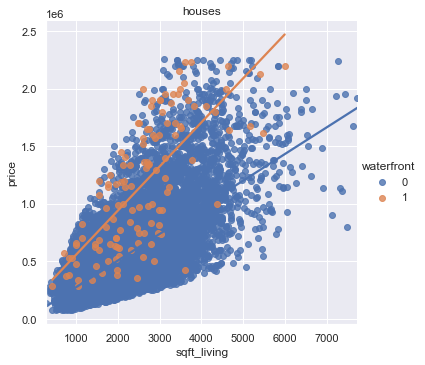

In [753]:
sns.lmplot(x ="sqft_living", y ="price", hue = "waterfront", data = house_ml, order = 1, ci = None).set(title='houses')

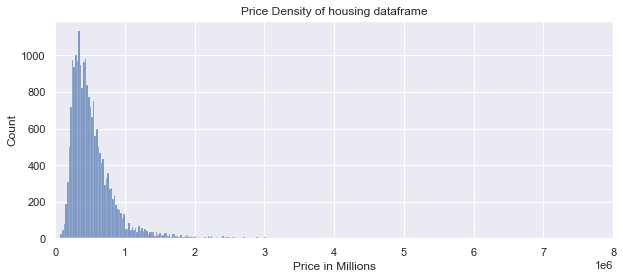

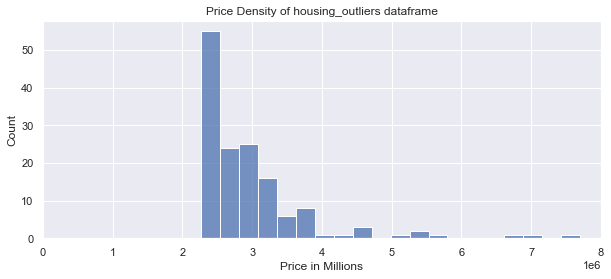

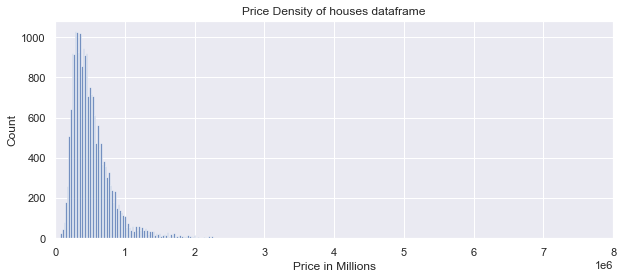

In [754]:
#Exploratory analysis of the three different dataframes for comparison of outliers and final dataframe

#Original housing dataframe
plt.figure(figsize=(10,4))
price_dist = sns.histplot(housing_ml["price"])
plt.xlim(0, 8000000)
price_dist.set(xlabel="Price in Millions", title="Price Density of housing dataframe")
plt.show()

#Outliers housing dataframe
plt.figure(figsize=(10,4))
price_dist = sns.histplot(housing_outliers["price"])
plt.xlim(0, 8000000)
price_dist.set(xlabel="Price in Millions", title="Price Density of housing_outliers dataframe")
plt.show()

#Final houses dataframe (3xICR removed)
plt.figure(figsize=(10,4))
price_dist = sns.histplot(house_ml["price"])
plt.xlim(0, 8000000)
price_dist.set(xlabel="Price in Millions", title="Price Density of houses dataframe")
plt.show()

### Geomap view of the location of homes
#### house_raw

In [755]:
# import street map
street_map = gpd.read_file('/Users/UE/Desktop/WA/tl_2016_53_cousub.shp')
# Generate geometry to contain the longtitude and latitude
gdf = gpd.GeoDataFrame(
    map2, geometry=gpd.points_from_xy(map2['long'], map2['lat']))
print(gdf.head())

NameError: name 'gpd' is not defined

NameError: name 'street_map' is not defined

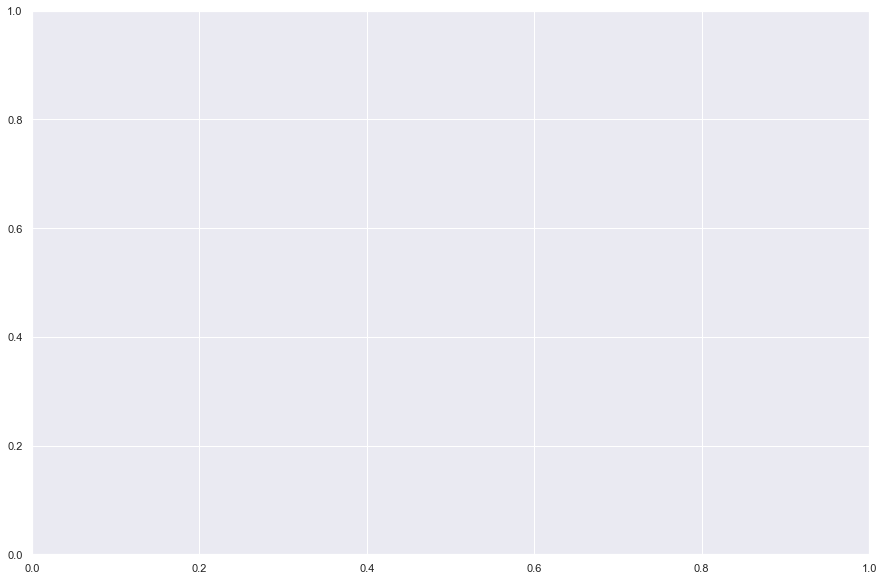

In [756]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,10))
# add .shp mapfile to axe
street_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
gdf.plot(column='price',ax=ax,alpha=0.5, legend=False,markersize=10)

# add title to graph
plt.title('House Prices in WA (The lighter, the price higher)', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-121.30,-122.60)
plt.ylim( 47.15,47.80)
# show map
plt.show()

### 2.14 sqft_above, sqft_basement and the house price:
#### house_raw: sqft_above and sqft_basement

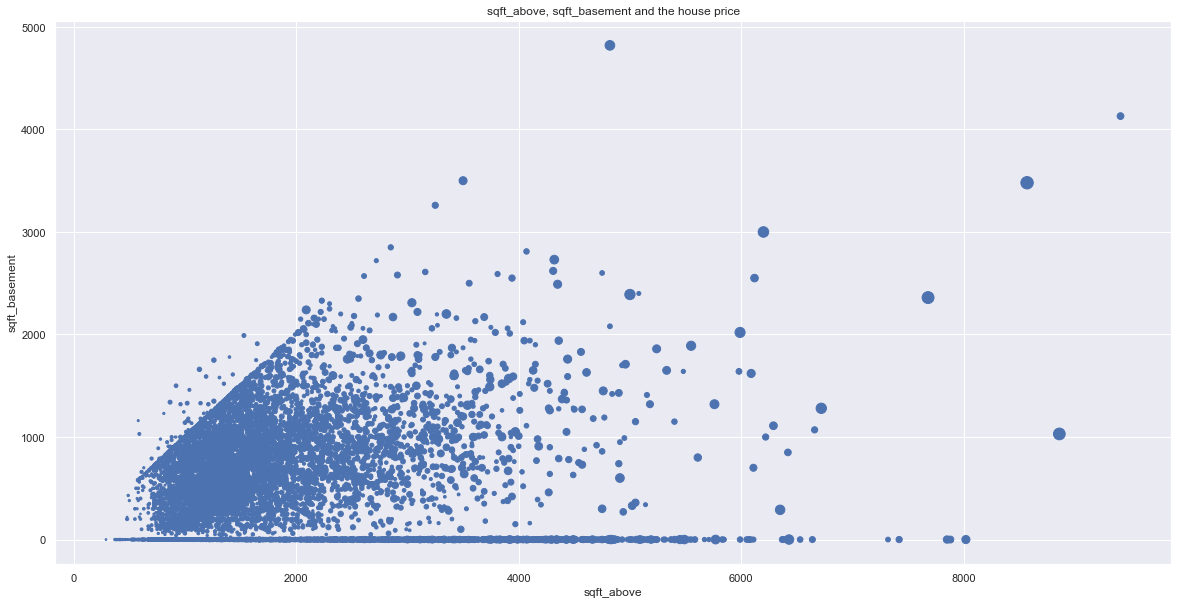

In [765]:
x = house_raw['sqft_above']
y = house_raw['sqft_basement']
size= house_raw['price']/50000
plt.xlabel("sqft_above")
plt.ylabel("sqft_basement")
plt.title("sqft_above, sqft_basement and the house price")
plt.scatter(x, y, s = size)

#### house_ml: sqft_above and sqft_basement

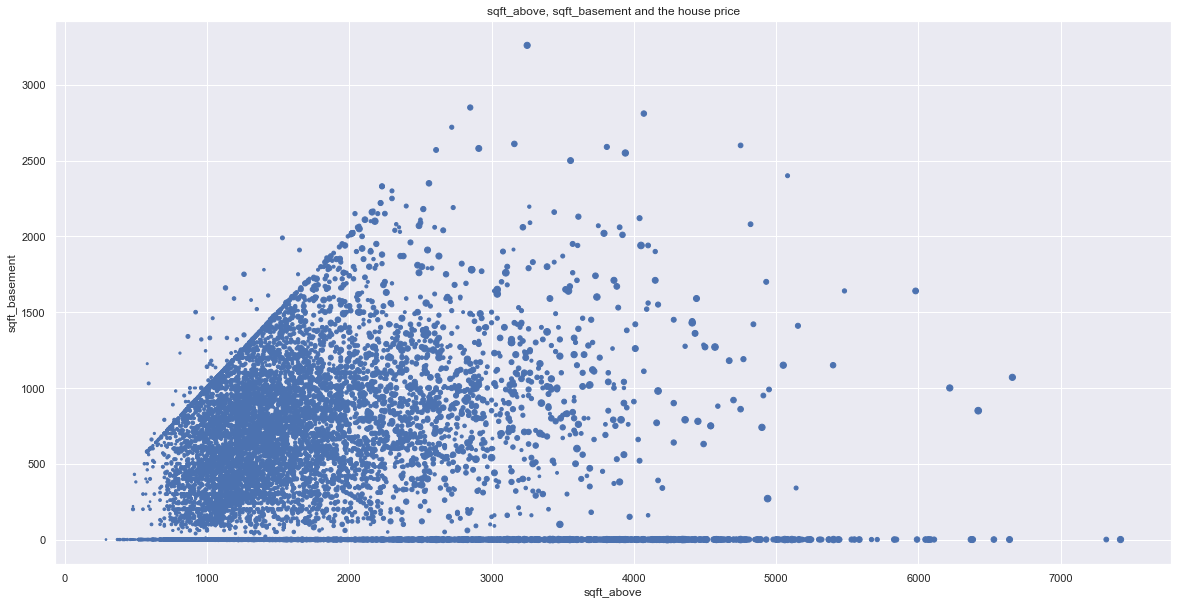

In [766]:
x = house_ml['sqft_above']
y = house_ml['sqft_basement']
size= house_ml['price']/50000
plt.xlabel("sqft_above")
plt.ylabel("sqft_basement")
plt.title("sqft_above, sqft_basement and the house price")
plt.scatter(x, y, s = size)

#### house_raw: sqft_above and price

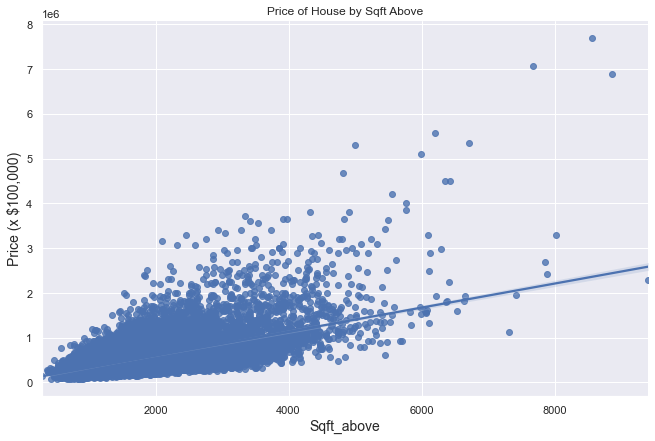

In [767]:
sns.lmplot(x ="sqft_above", y ="price", data = house_raw,
height=6, aspect=1.5)
plt.xlabel('Sqft_above', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('Price of House by Sqft Above')
plt.show()

#### house_ml: sqft_above and price

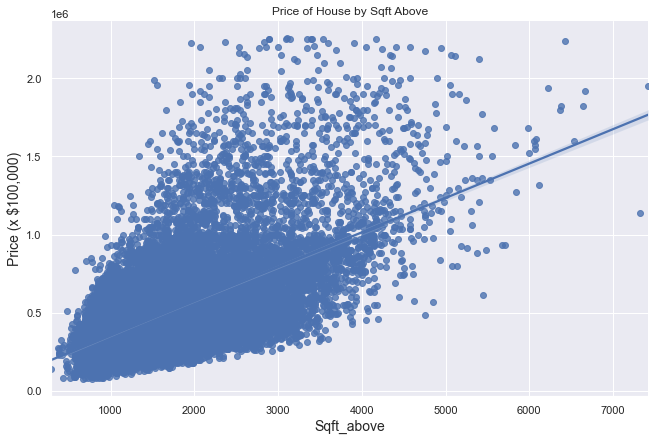

In [768]:
sns.lmplot(x ="sqft_above", y ="price", data = house_ml,
height=6, aspect=1.5)
plt.xlabel('Sqft_above', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('Price of House by Sqft Above')
plt.show()

#### house_raw: sqft_basement and price

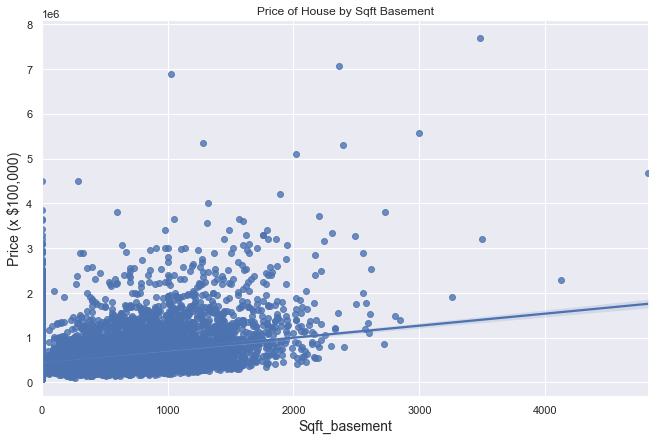

In [769]:
sns.lmplot(x ="sqft_basement", y ="price", data = house_raw,
height=6, aspect=1.5)
plt.xlabel('Sqft_basement', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('Price of House by Sqft Basement')
plt.show()

#### house_ml: sqft_basement and price

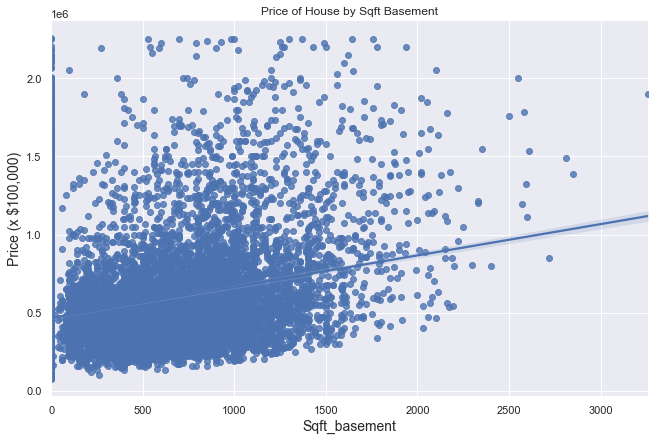

In [770]:
sns.lmplot(x ="sqft_basement", y ="price", data = house_ml,
height=6, aspect=1.5)
plt.xlabel('Sqft_basement', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('Price of House by Sqft Basement')
plt.show()

# Part 3, Regression analysis

### Will now create machine learning models after cleaning and wrangling the data
### Thus, Let's create a linear regression to predict the house price
### house_raw

In [771]:
Var_List = [ "bedrooms", "bathrooms","sqft_living", "sqft_lot",
            "waterfront","view","grade", "sqft_above", "sqft_basement"]

In [772]:
#Linear Regression model
Y = house_raw['price']
lr = LinearRegression()
lr.fit(house_raw[Var_List], Y)

LinearRegression()

In [773]:
print("The R^2 value is: " + str(lr.score(house_raw[Var_List], Y)))

The R^2 value is: 0.5947876150041329


### thsi is a low R^2 value, will switch to random forest to see if a different model is better

In [774]:
Var_List = [ "bedrooms", "bathrooms","sqft_living", "sqft_lot","floors","condition",
            "waterfront","view","condition","grade", "sqft_above", "sqft_basement",
            "yr_renovated", "lat", "long", "zipcode"]

In [775]:
X = house_raw[Var_List]
Y = house_raw['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [776]:
print("x_train:",x_train.shape)
print("y_test:",x_test.shape)
print("y_train:",y_train.shape[0])
print("y_test:",y_test.shape[0])

x_train: (17290, 16)
y_test: (4323, 16)
y_train: 17290
y_test: 4323


In [777]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [778]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 88.08


### This is an excellent R^2, will increase the estimators to see if it improves further

In [779]:
regressor = RandomForestRegressor(n_estimators=250, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [780]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 88.19


#### Increasing estimators doesn't improve accuracy that much more, this is probably the maximum prediction

Text(0, 0.5, 'Predicted')

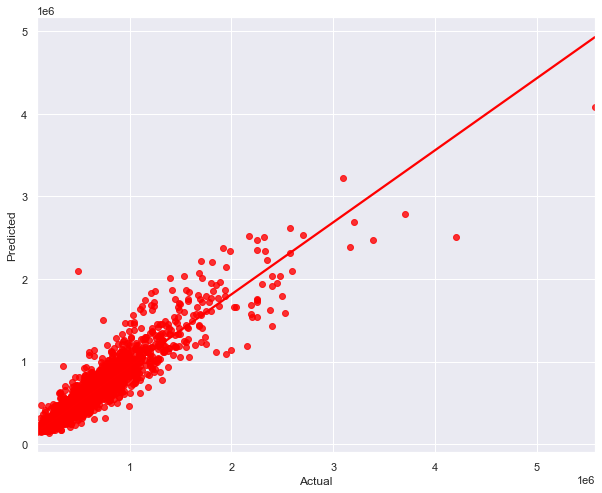

In [781]:
plt.figure(figsize=(10,8))
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

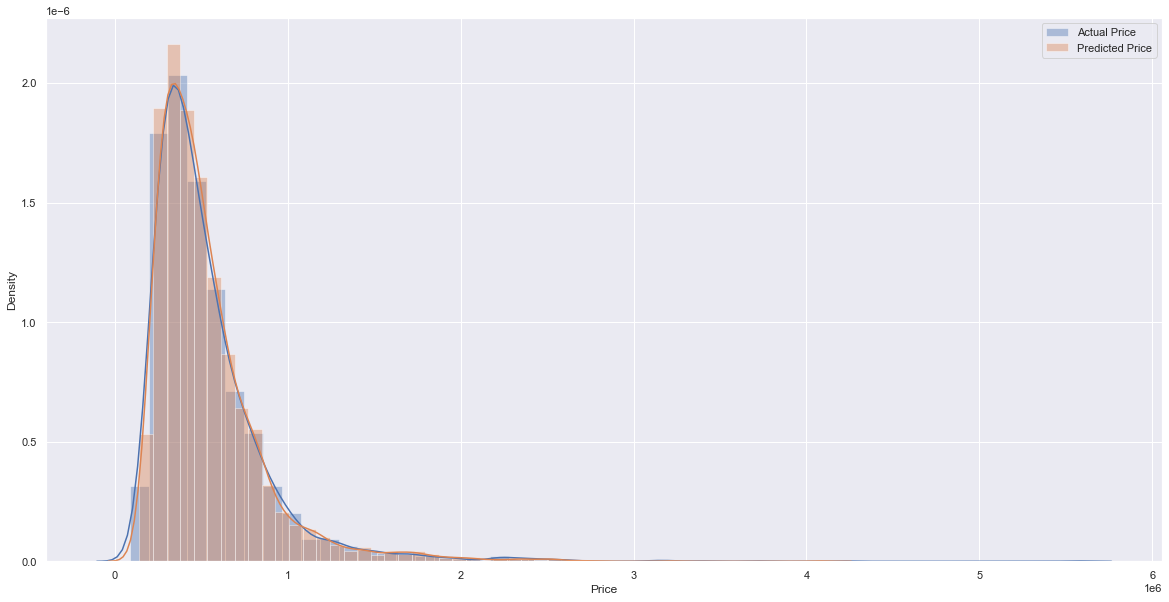

In [782]:
# Plot distribution of predictions
f, ax = plt.subplots(figsize=(20, 10)) 
sns.distplot(y_test, hist=True, label="Actual Price")
sns.distplot(y_pred, hist=True, label="Predicted Price")
plt.xlabel("Price")
plt.legend()
plt.show()

### Will now use a linear regression model for the house_ml data 
### house_ml

In [783]:
#This model with more variables and log dropped is higher; I will add even more variables to see if I can increase accuracy
features = ["sqft_living","sqft_living15","sqft_above","bathrooms","bedrooms","view","floors","waterfront","lat","sqft_basement","grade", "sqft_lot", "condition", "yr_built", "yr_renovated"] 

In [784]:
#Linear Regression model
Y = house_ml['price']
lr = LinearRegression()
lr.fit(house_ml[features], Y)

print("Predicted values: " + str(lr.predict(house_ml[features])))

print("The R^2 value is: " + str(lr.score(house_ml[features], Y)))

Predicted values: [277288.95104396 697928.91519157 401086.75059459 ... 199498.59002988
 395201.72572275 201795.66490807]
The R^2 value is: 0.698889664135581


In [785]:
#Train a model to evaluate with 80% train:
X = house_ml[features]
Y = house_ml['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#shapes of splitted data
print("x_train:",x_train.shape)
print("y_test:",x_test.shape)
print("y_train:",y_train.shape[0])
print("y_test:",y_test.shape[0])

x_train: (17173, 15)
y_test: (4294, 15)
y_train: 17173
y_test: 4294


In [786]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
y_pred

array([306028.25591234, 396338.86878691, 416534.45378081, ...,
       353551.95134666, 709058.22543122, 338553.11762398])

In [787]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 69.82


### This is a low R^2 score, will try random forest as well to see if it improves

In [789]:
X = house_ml[features]
Y = house_ml['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [790]:
#shapes of splitted data
print("x_train:",x_train.shape)
print("y_test:",x_test.shape)
print("y_train:",y_train.shape[0])
print("y_test:",y_test.shape[0])

x_train: (17173, 15)
y_test: (4294, 15)
y_train: 17173
y_test: 4294


In [791]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [792]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 83.20


### This is a great R^2, but lower than the houses_raw, will also try to increase the estimators to improve performance

In [793]:
regressor = RandomForestRegressor(n_estimators=250, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [794]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 83.31


#### The accuracy did not improve much wiht a higher estimator count, this is probably the max percent

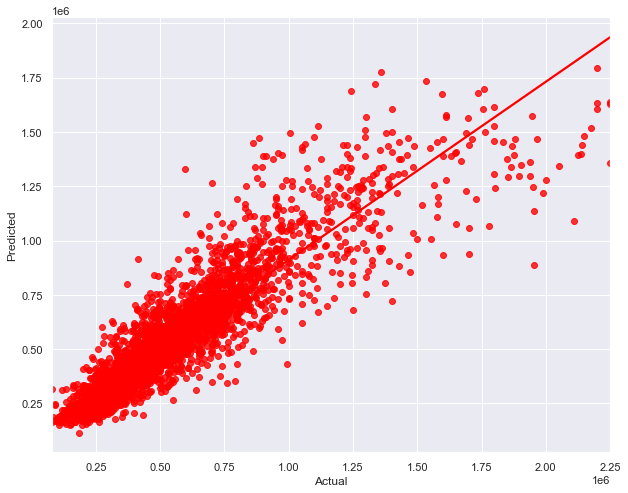

In [795]:
plt.figure(figsize=(10,8))
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.xlabel('Actual');
plt.ylabel('Predicted');

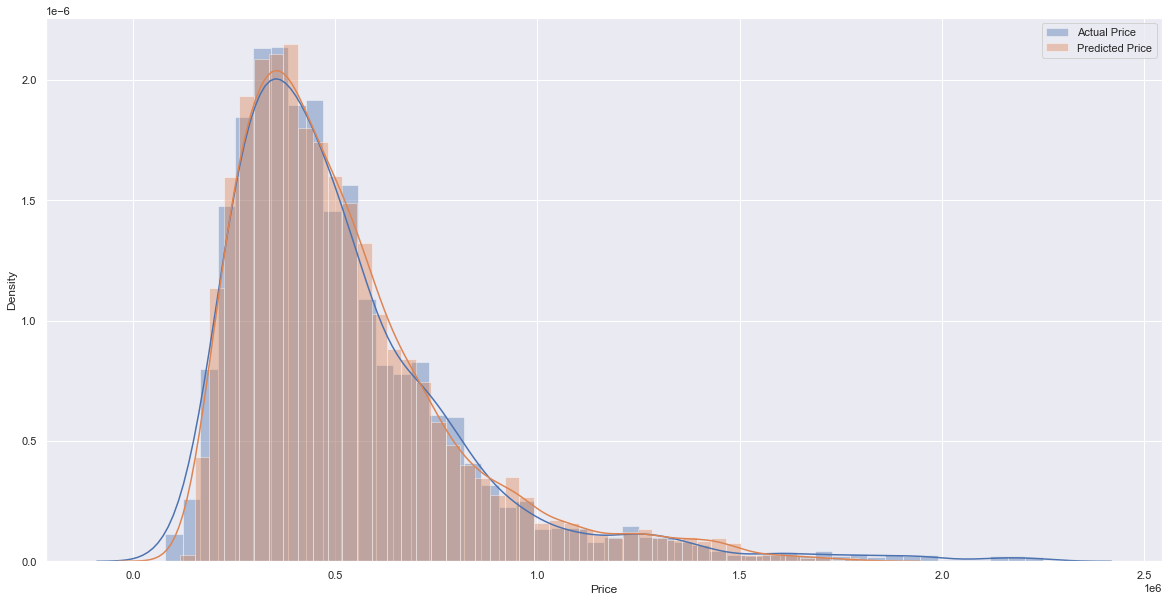

In [796]:
# Plot distribution of predictions
f, ax = plt.subplots(figsize=(20, 10)) 
sns.distplot(y_test, hist=True, label="Actual Price")
sns.distplot(y_pred, hist=True, label="Predicted Price")
plt.xlabel("Price")
plt.legend()
plt.show()